<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/sales_forecast_str_csc_day_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing New Libraries**

In [10]:
!pip install python-weather
!pip install meteostat
!pip install geopandas
!pip install geopy
!pip install pgeocode
!pip install pyowm
!pip install wwo-hist
!pip install openweathermap_requests
!pip install holidays
!pip install shap
!pip install optuna
!pip install hyperopt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

# **Importing Libraries**

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from geopy.geocoders import Nominatim
import xgboost
print(xgboost.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pgeocode
import numpy as np
import pyowm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from wwo_hist import retrieve_hist_data
from openweathermap_requests import OpenWeatherMapRequests
from statsmodels.formula.api import ols
import statsmodels.api as sm
import holidays
import datetime
from datetime import date
from datetime import timedelta
import xgboost as xgb
from xgboost import plot_importance, plot_tree

0.90


# **Holiday**

In [12]:
class holiday:
    """
    This class lists both Federal and State holidays for current year 
    and next 9 years.
    """
    def __init__(self):
        """
        This initialization method obtains current year and lists all USA states.
        """
        self.current_year = date.today().year
        self.states_list = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 
                             'CO', 'CT', 'DC', 'DE', 'FL', 
                             'GA', 'HI', 'IA', 'ID', 'IL', 
                             'IN', 'KS', 'KY', 'LA', 'MA', 
                             'MD', 'ME', 'MI', 'MN', 'MO', 
                             'MS', 'MT', 'NC', 'ND', 'NE', 
                             'NH', 'NJ', 'NM', 'NV', 'NY', 
                             'OH', 'OK', 'OR', 'PA', 'RI', 
                             'SC', 'SD', 'TN', 'TX', 'UT', 
                             'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
                            ]
        self.holiday_date_list = []
        self.holiday_details_list = []
        self.df_holiday = pd.DataFrame()
    
    def collect_federal_holiday_list(self):
        """
        This method lists all federal holidays along with observed ones
        in USA in a given year.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            # Print all the holidays in United States in the year 
            for federal_holiday_val in holidays.UnitedStates(years = year, observed = True).items():
                print(f"Federal Holiday :: {str(federal_holiday_val[0])} :: {federal_holiday_val[1]}")
                self.holiday_date_list.append(federal_holiday_val[0])
                self.holiday_details_list.append(('FE', 
                                                  year, 
                                                  str(federal_holiday_val[0]), 
                                                  federal_holiday_val[1]
                                                 )
                                                )

    def collect_state_holiday_list(self):
        """
        This method lists all state holidays along with observed ones
        in USA in a given year which are not federal holidays.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            for state in self.states_list:
                for state_holiday_val in holidays.UnitedStates(years = year, observed = True, subdiv = state).items():
                    if state_holiday_val[0] not in self.holiday_date_list:
                        print(f"State {state} Holiday :: {str(state_holiday_val[0])} :: {state_holiday_val[1]}")
                        self.holiday_date_list.append(state_holiday_val[0])
                        self.holiday_details_list.append((state, 
                                                          year, 
                                                          str(state_holiday_val[0]), 
                                                          state_holiday_val[1]
                                                          )
                                                        )
    
    def get_holiday(self, year):
        """
        This method provides the list of federal and state holidays 
        in a given year. It also writes the data in a csv file with name format 
        as holiday_list_<<4 digit year, comes from input parameter>>.csv.
        """
        yearly_holiday_list = []
        print(f"List of holidays in {year}:-")
        #print(self.holiday_details_list)
        for holiday_val in self.holiday_details_list:
            if holiday_val[1] == year:
                print(f"{holiday_val[0]} :: {holiday_val[1]} :: {holiday_val[2]} :: {holiday_val[3]}")
                yearly_holiday_list.append(holiday_val)
        self.df_holiday = pd.DataFrame(yearly_holiday_list, columns =['level', 'year', 'date', 'holiday_name'])
        #print(self.df_holiday)
        self.df_holiday.to_csv('holiday_list_' + str(year) + '.csv', index = False)
        return self.df_holiday
    
    def __repr__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}")

    def __str__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}") 

current_year = date.today().year
hdy = holiday()
help(holiday)
hdy.collect_federal_holiday_list()
hdy.collect_state_holiday_list()

current_year_hdy = hdy.get_holiday(current_year)
one_year_ago_year_hdy = hdy.get_holiday(current_year-1)
two_year_ago_year_hdy = hdy.get_holiday(current_year-2)
three_year_ago_year_hdy = hdy.get_holiday(current_year-3)
df_holiday_combined = pd.concat([current_year_hdy, one_year_ago_year_hdy, two_year_ago_year_hdy])

Help on class holiday in module __main__:

class holiday(builtins.object)
 |  This class lists both Federal and State holidays for current year 
 |  and next 9 years.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      This initialization method obtains current year and lists all USA states.
 |  
 |  __repr__(self)
 |      This method prints states list and current year.
 |  
 |  __str__(self)
 |      This method prints states list and current year.
 |  
 |  collect_federal_holiday_list(self)
 |      This method lists all federal holidays along with observed ones
 |      in USA in a given year.
 |  
 |  collect_state_holiday_list(self)
 |      This method lists all state holidays along with observed ones
 |      in USA in a given year which are not federal holidays.
 |  
 |  get_holiday(self, year)
 |      This method provides the list of federal and state holidays 
 |      in a given year. It also writes the data in a csv file with name format 
 |      as holiday_list_<<4 d

In [13]:
df_holiday_combined

level  year        date                          holiday_name
0     FE  2022  2022-01-01                        New Year's Day
1     FE  2022  2022-01-17            Martin Luther King Jr. Day
2     FE  2022  2022-02-21                 Washington's Birthday
3     FE  2022  2022-05-30                          Memorial Day
4     FE  2022  2022-06-19  Juneteenth National Independence Day
..   ...   ...         ...                                   ...
44    VA  2020  2020-01-17                       Lee Jackson Day
45    VT  2020  2020-03-03                      Town Meeting Day
46    VT  2020  2020-08-16                 Bennington Battle Day
47    VT  2020  2020-08-17      Bennington Battle Day (Observed)
48    WV  2020  2020-06-20                     West Virginia Day

[152 rows x 4 columns]

# **Setting up the Period**

In [14]:
# Set time period
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 31)

# **Getting Weather Data at Day and Zipcode Level**

In [15]:
df_weather = pd.read_csv('result_3zip_weather.csv')
df_weather.columns = [col.lower() for col in df_weather.columns]
df_weather['zip5'] = df_weather['zip5'].astype(str)
df_weather['zip5'] = df_weather['zip5'].apply(lambda x : x.zfill(5))
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0  01749  2019-03-20                  50.8                 24.3       1   
1  02747  2019-03-20                  52.2                 21.7       1   
2  05673  2019-03-20                  44.9                 16.9       3   
3  01749  2019-03-21                  51.5                 32.2      26   
4  02747  2019-03-21                  53.1                 31.7      12   

   precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                 0               6      30          LOW            14.9   
1                 0               6      22          LOW            17.9   
2                 0               6       0          LOW            11.9   
3                66               6      30      MINIMAL            14.9   
4                66               6      30      MINIMAL            32.8   

   humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0            30           18.8            0.0            0.0   
1            29           19.2            0.0            0.0   
2            47           23.1            0.0            0.0   
3            41           26.5            0.5            0.0   
4            38           26.1            0.5            0.0   

   comfort_index_amt  precipitation_probability_pct feed_cd  \
0               44.8                              3     OTH   
1               46.1                              0     OTH   
2               37.1                              6     OTH   
3               46.1                             93     OTH   
4               46.1                             99     OTH   

                  last_update_ts  
0  2019-03-20 07:31:11.000 -0600  
1  2019-03-20 07:31:11.000 -0600  
2  2019-03-20 07:31:11.000 -0600  
3  2019-03-21 07:31:31.000 -0600  
4  2019-03-21 07:31:31.000 -0600

# **Loading 5 digit zip codes for Shaws stores.**

In [16]:
df_zip = pd.read_csv('zipcode.txt')
df_zip.columns = [col.lower() for col in df_zip.columns]
df_zip = df_zip.drop_duplicates()
df_zip['zipcode'] = df_zip['zipcode'].apply(lambda x : x.replace("'",""))
df_zip.head()

zipcode
0   05602
1   02067
2   04530
3   02199
4   02126

In [17]:
df_zip[df_zip.zipcode == '03458']

zipcode
148   03458

# **Loading Shaw's Stores Store-Zipcode Combination Data**

In [18]:
df_str_zip = pd.read_csv('store_zipcode.txt')
df_str_zip['zip_code'] = df_str_zip['zip_code'].astype(str)
df_str_zip['zip_code'] =  df_str_zip['zip_code'].apply(lambda x : x.zfill(5))
df_str_zip.columns = ['store_id', 'zip_code']
df_str_zip.head()

store_id zip_code
0       121    05602
1       418    02067
2       553    04530
3       602    02199
4       604    02126

In [19]:
df_str_zip[df_str_zip.zip_code == '03458']

store_id zip_code
148      4694    03458

# **Combining weather and zip code data together.**

In [20]:
df_weather = pd.merge(df_weather, df_str_zip, how = 'inner', left_on = 'zip5', right_on = 'zip_code')

In [21]:
df_weather.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'last_update_ts',
       'store_id', 'zip_code'],
      dtype='object')

In [22]:
df_weather = df_weather [['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 
       'store_id']]
df_weather = df_weather[df_weather['zip5'].isin(['02747','05673','05764'])]

In [23]:
df_weather.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
Name: 1329, dtype: object

# **Getting historical min, max and avg temp weather data on a particular day and zipcode level.**

05602


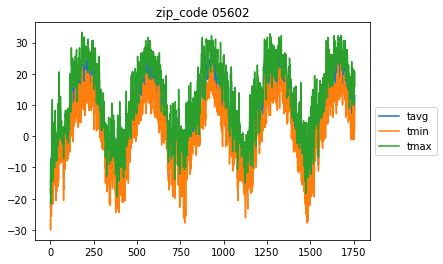

02067


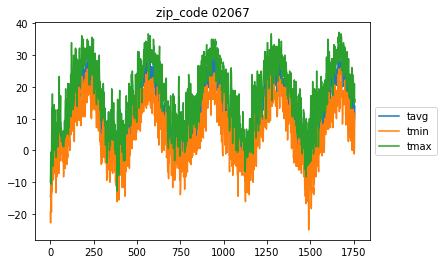

04530


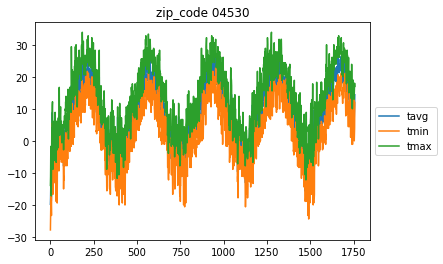

02199


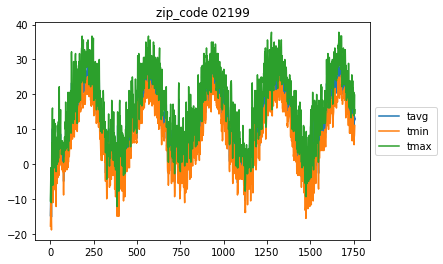

02126


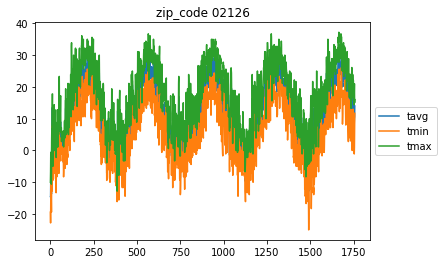

05446


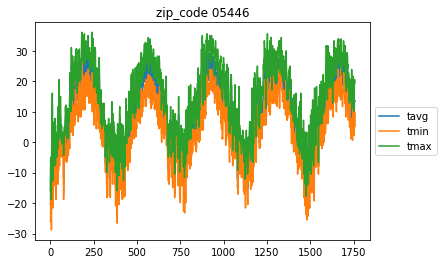

02747


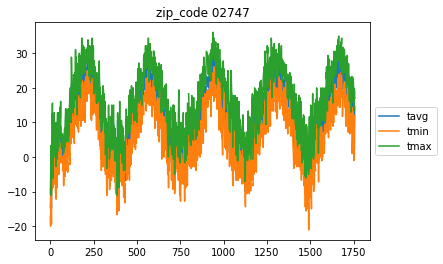

01757


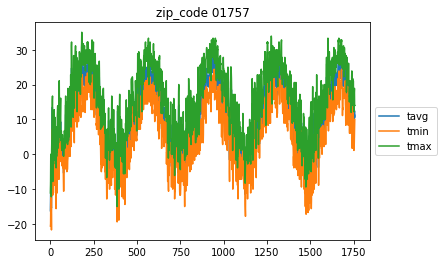

03087


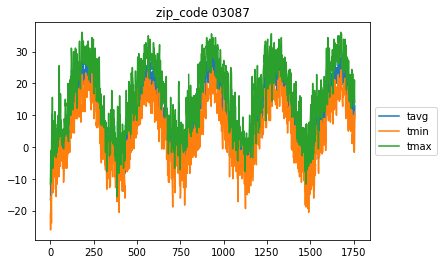

02341


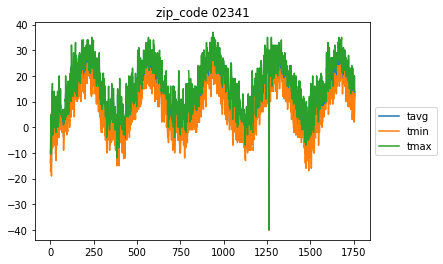

02720


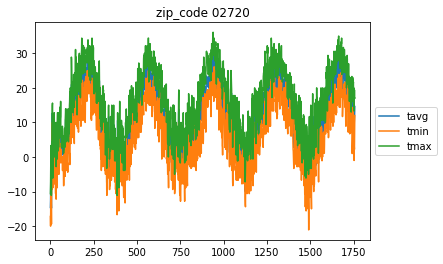

02052


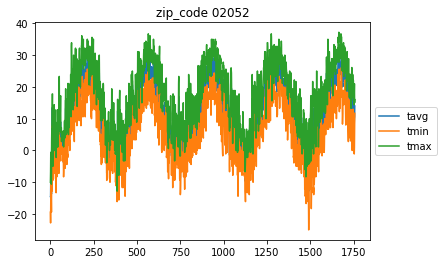

01721


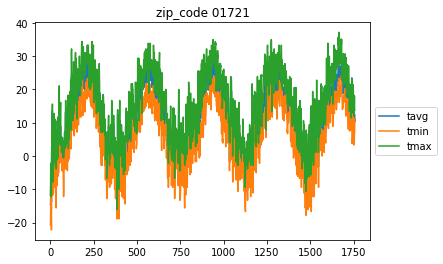

02453


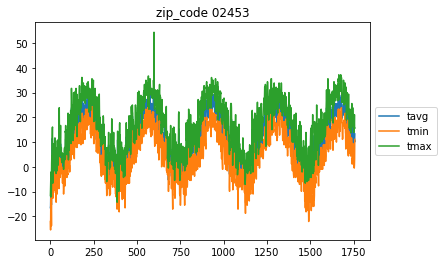

02025


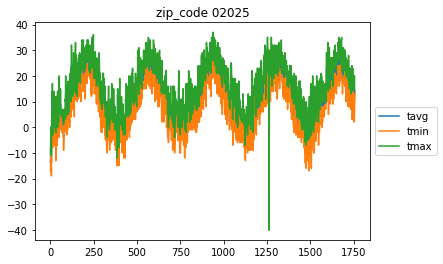

05495


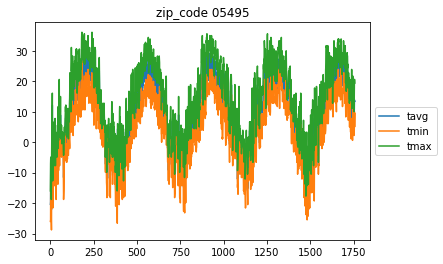

03785


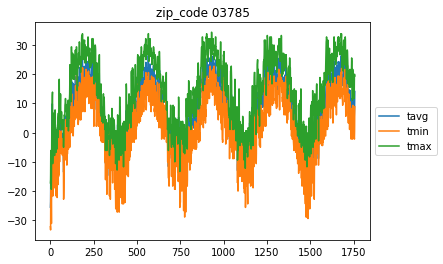

04210


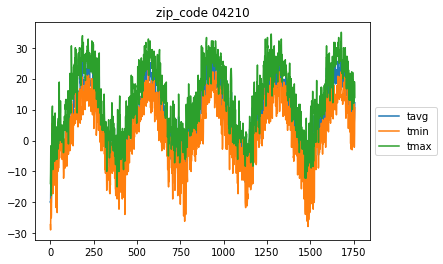

04330


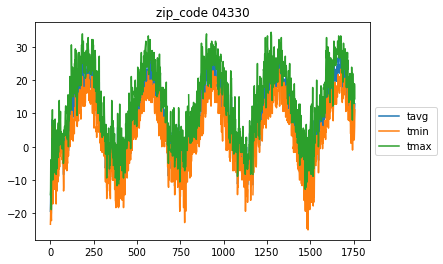

01776


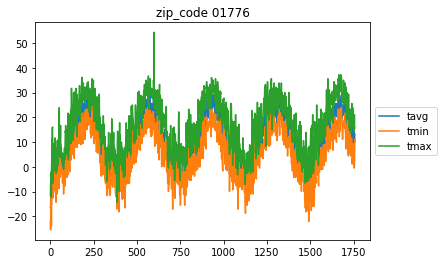

02169


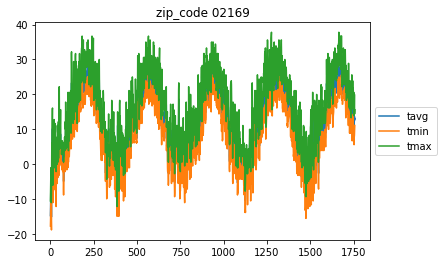

04072


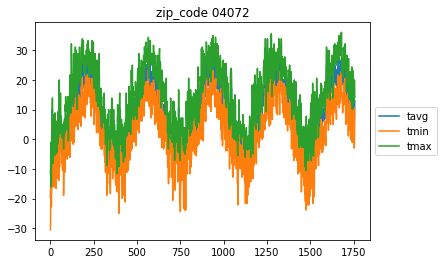

02189


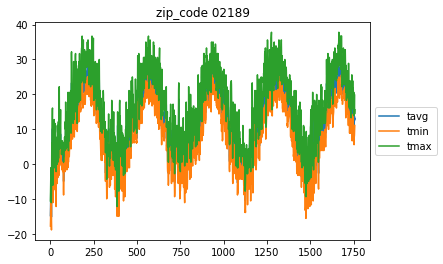

03038


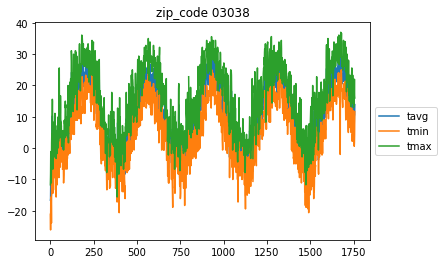

02460


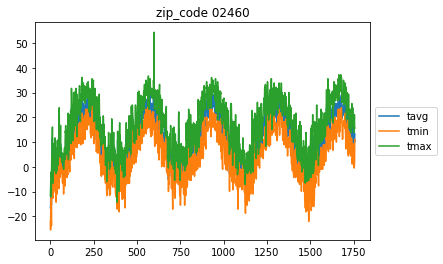

02038


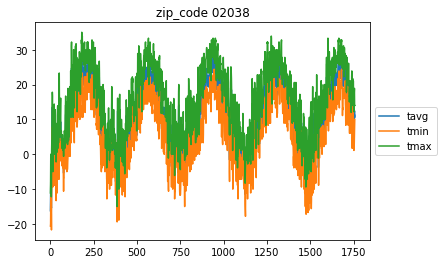

02215


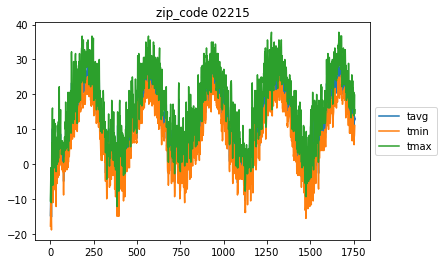

01915


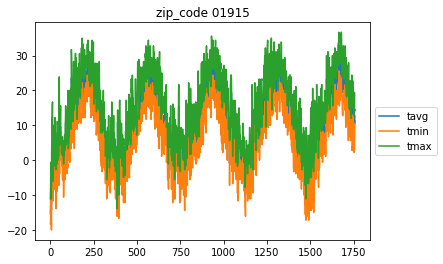

04105


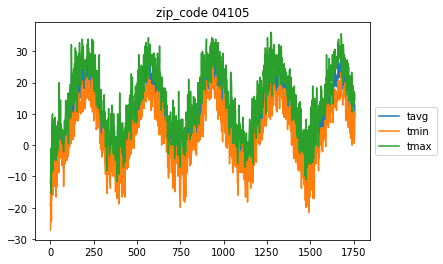

04605


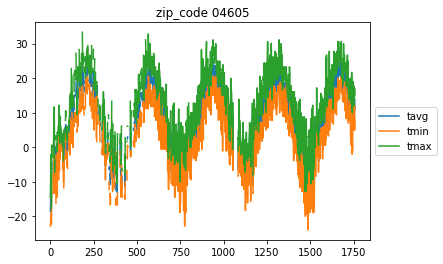

03060


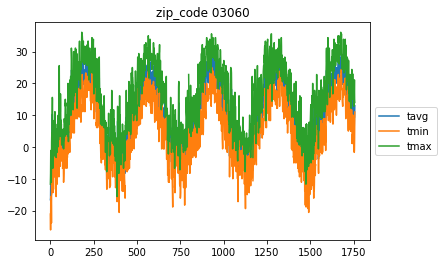

05403


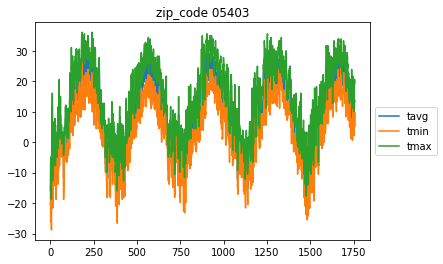

02140


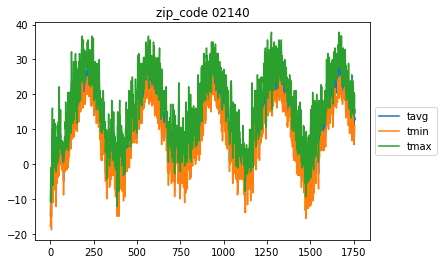

05363


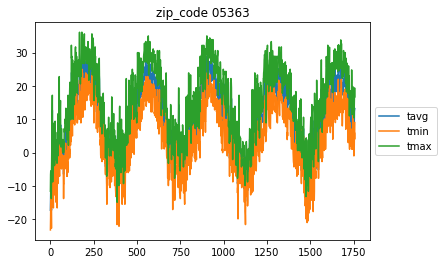

05673


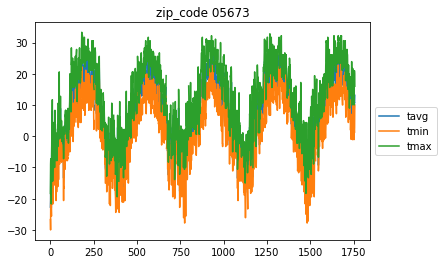

02026


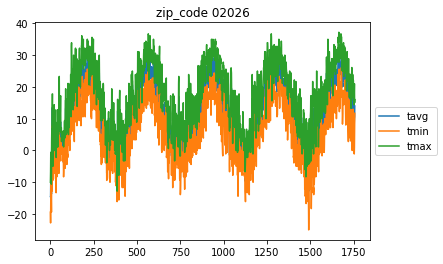

02021


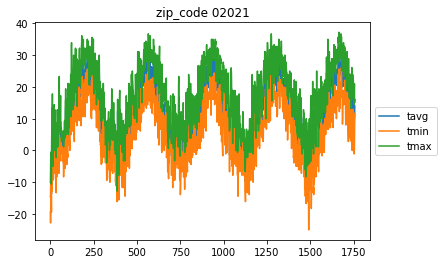

02048


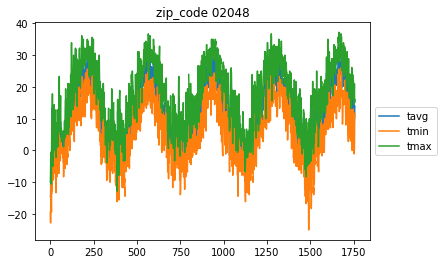

02339


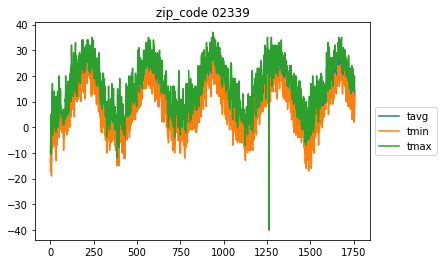

02886


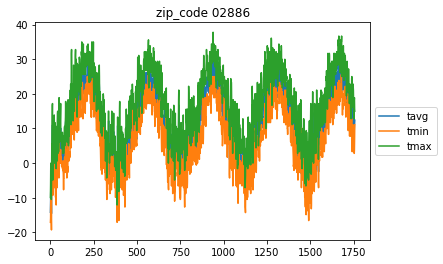

03053


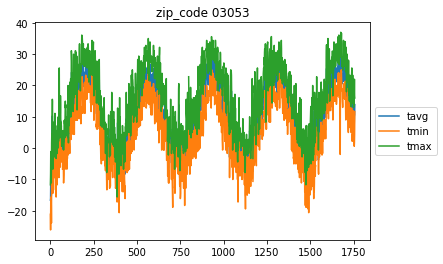

01803


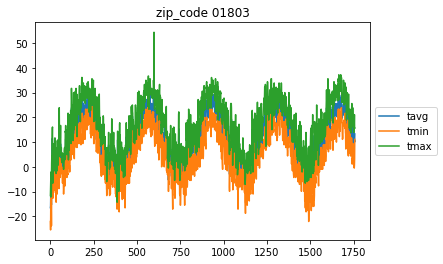

05060


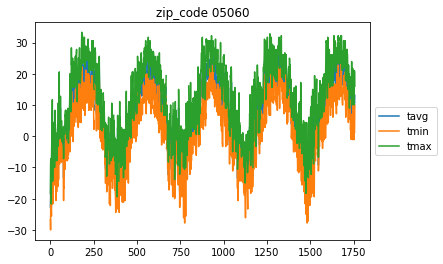

05255


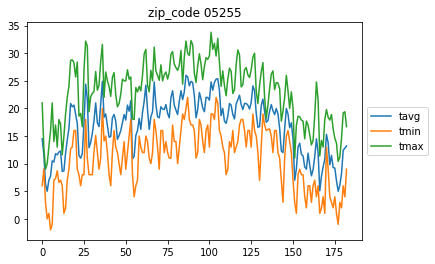

02536


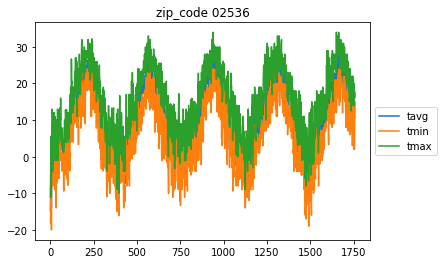

04032


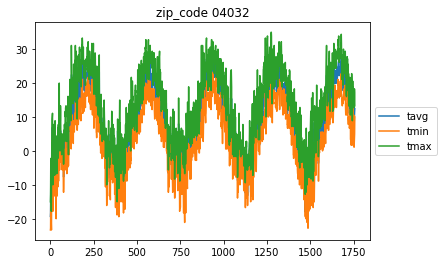

05829


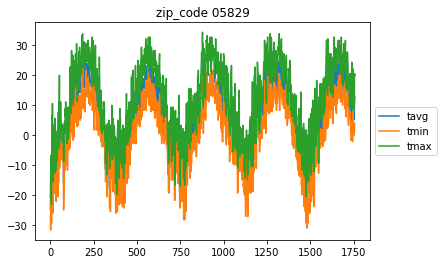

03885


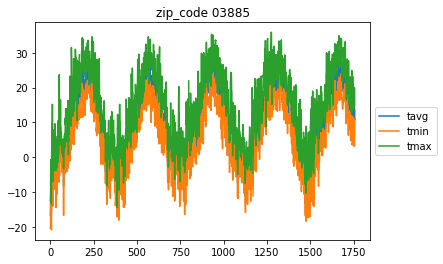

01603


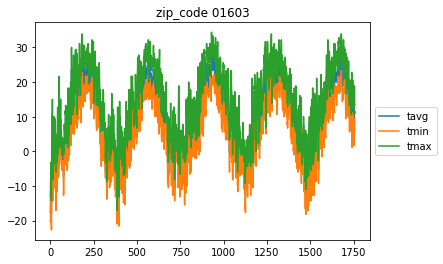

01605


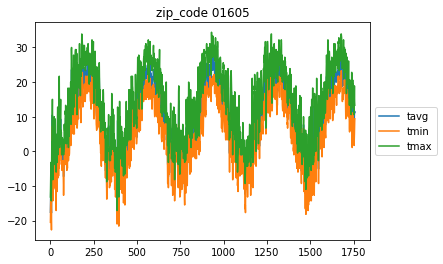

02920


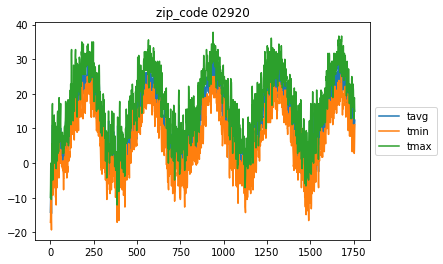

01450


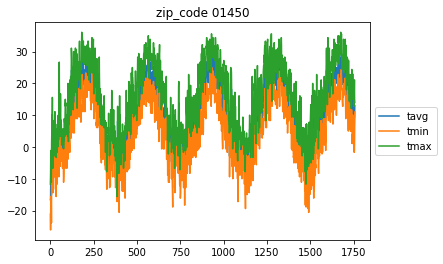

04011


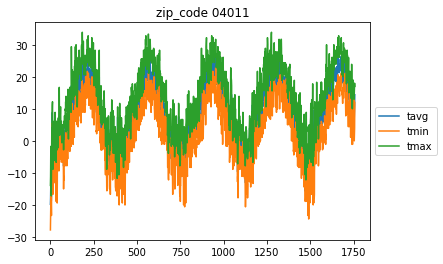

04426
02467


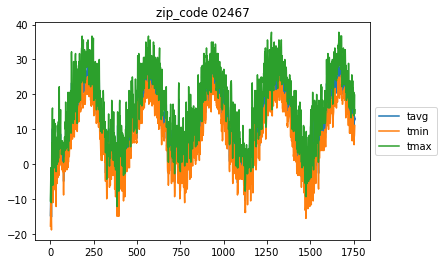

05676


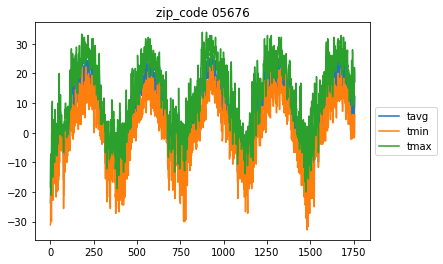

01510


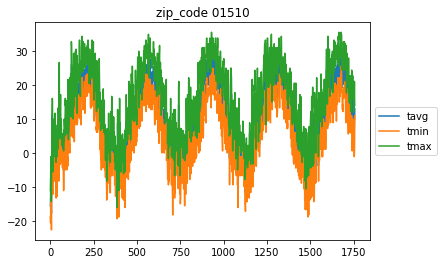

03054


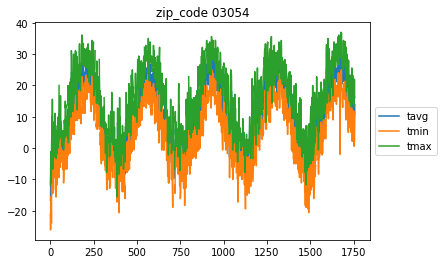

02653


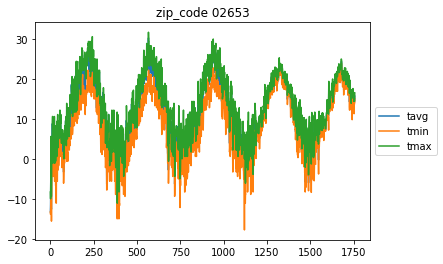

03301


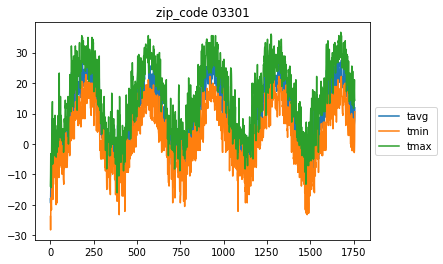

02128


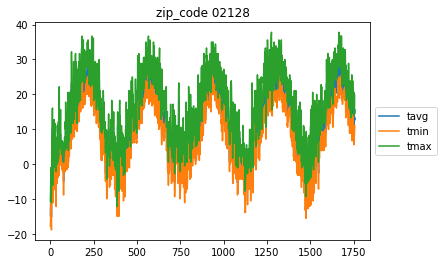

05753


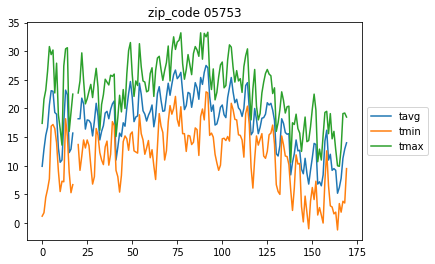

05764


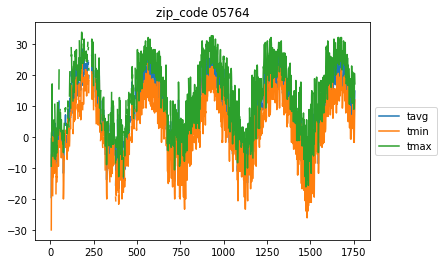

05743


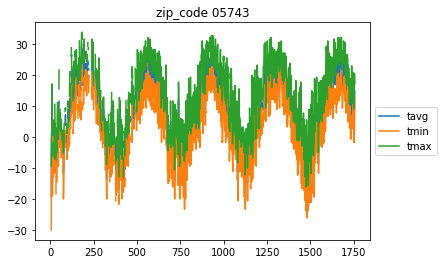

02349


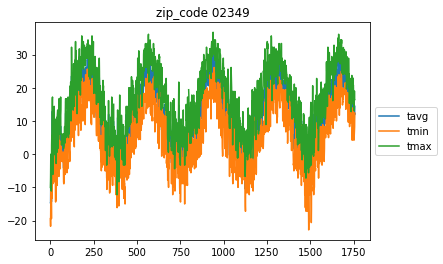

02184


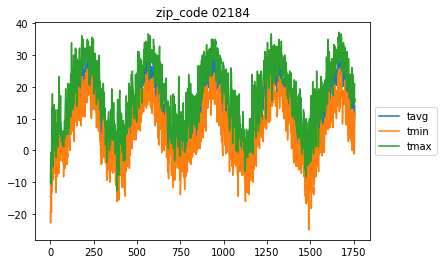

02760


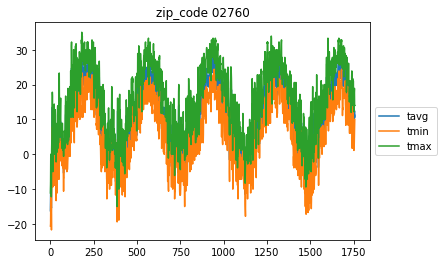

02368


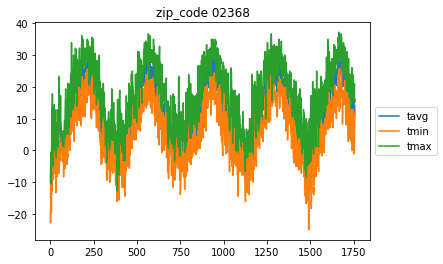

02767


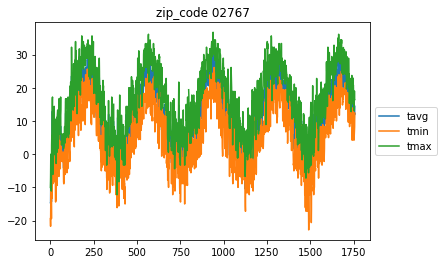

02301


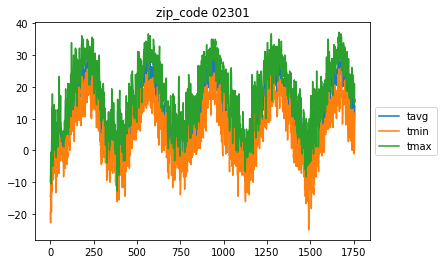

02053


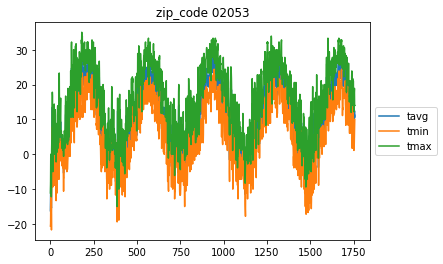

01588


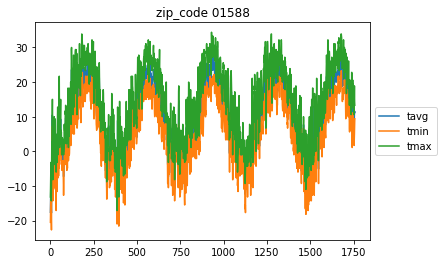

02806


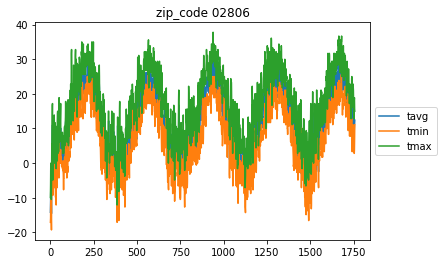

02842


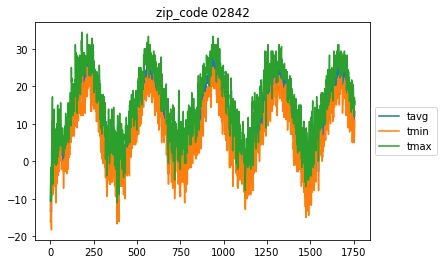

02601


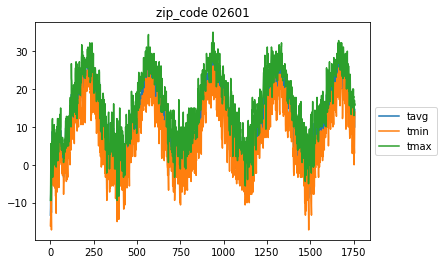

04578


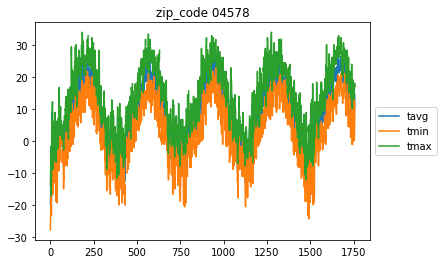

02330


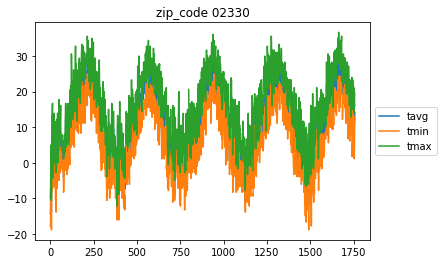

03220


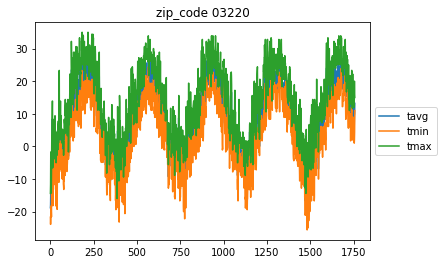

05672


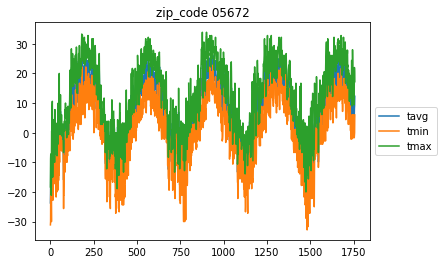

03818
02356


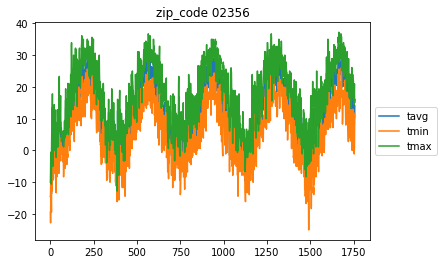

02879


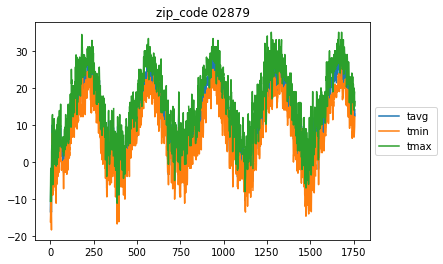

01545


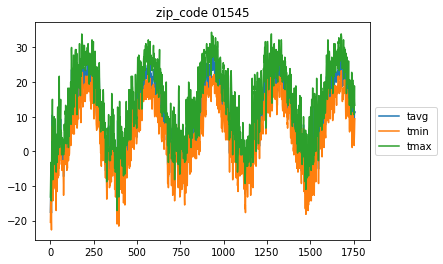

01566


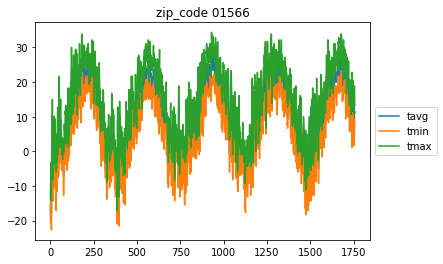

01960


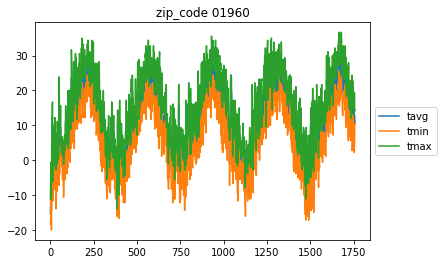

03820


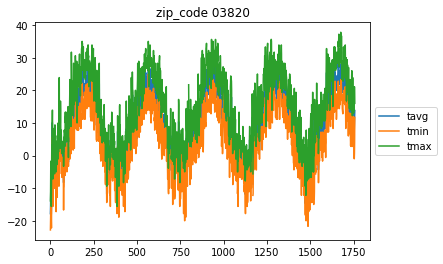

01950


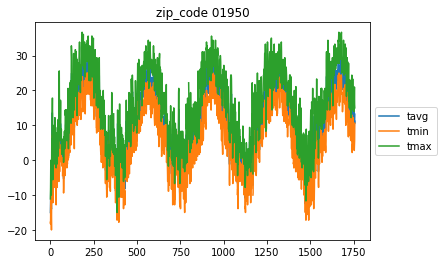

03055


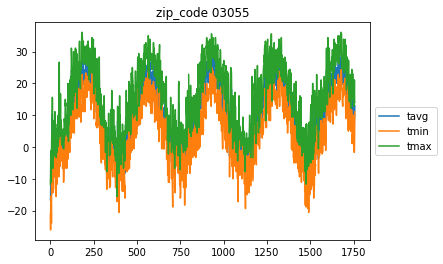

01970


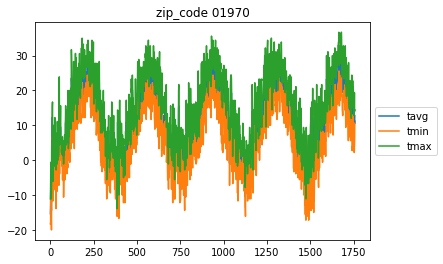

05149


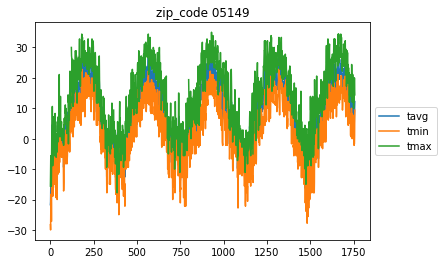

05156


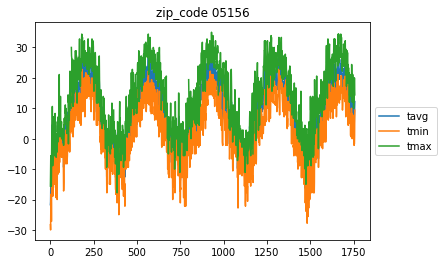

03584
05491


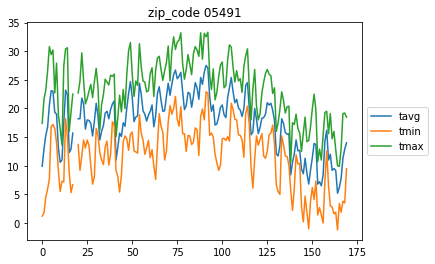

04062


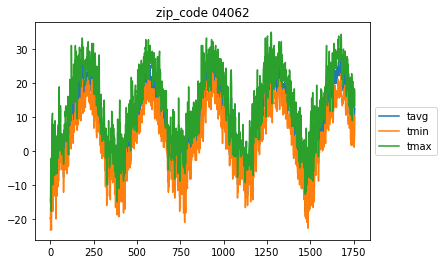

04103


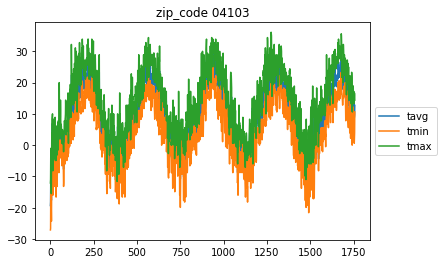

04074


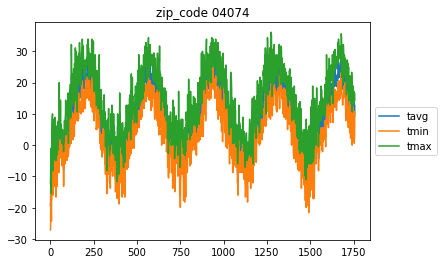

02138


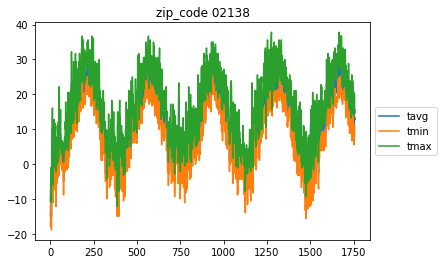

02452


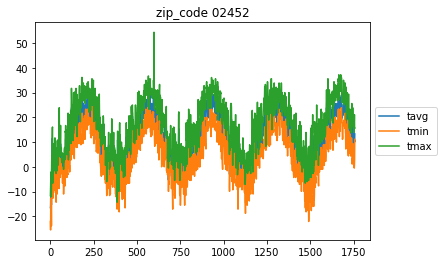

02145


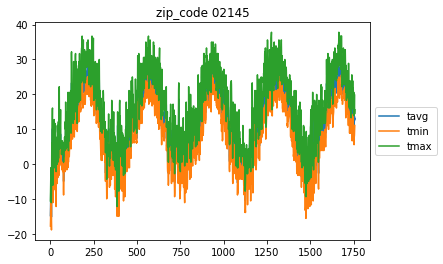

02136


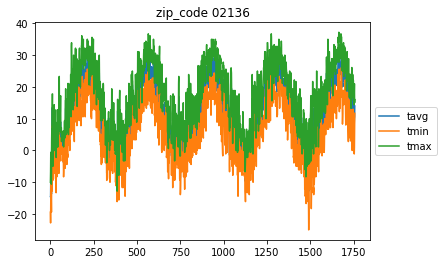

02478


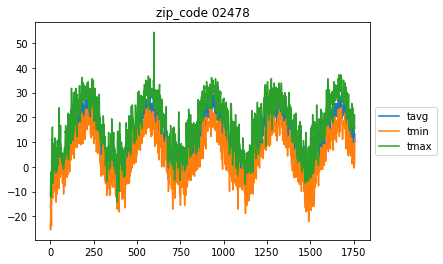

01775


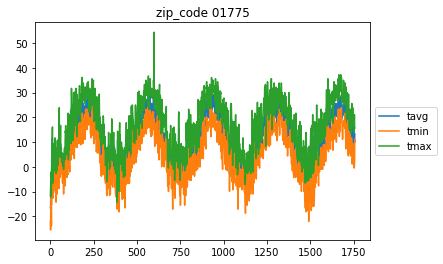

02360


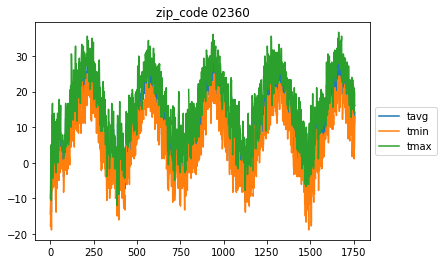

02050


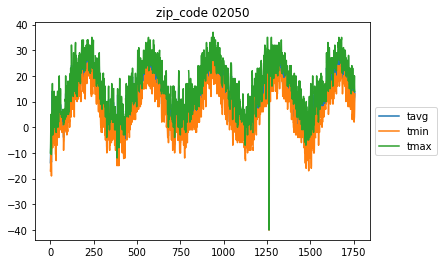

03561


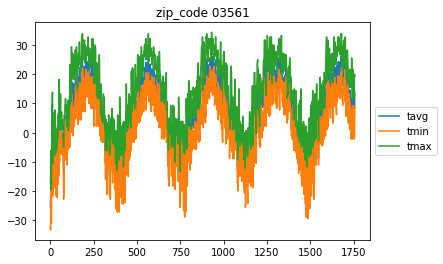

02571


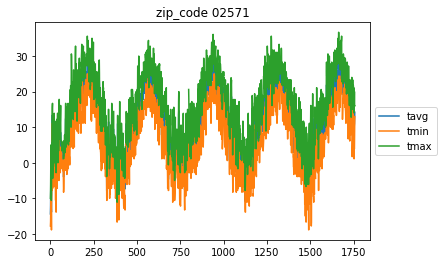

01749


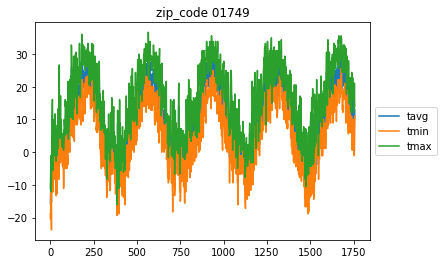

02915


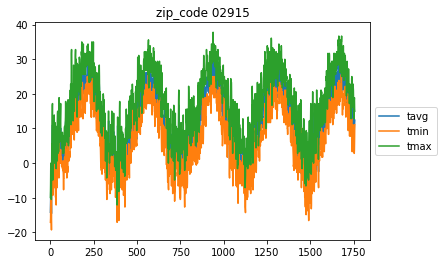

02176


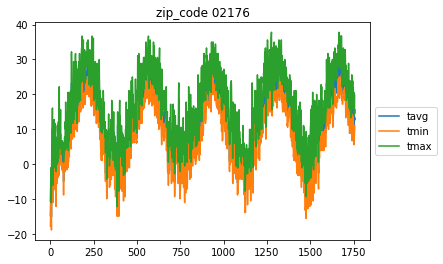

05443


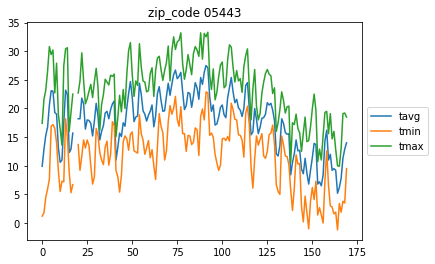

03608


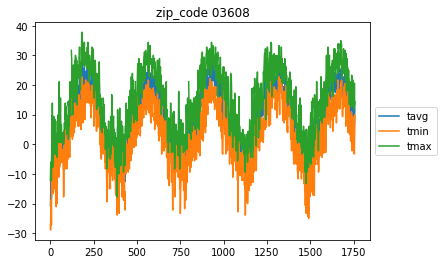

04106


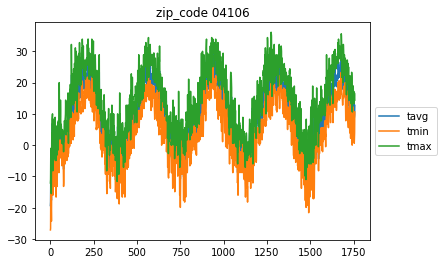

04841


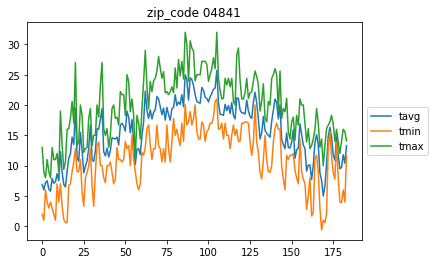

04901


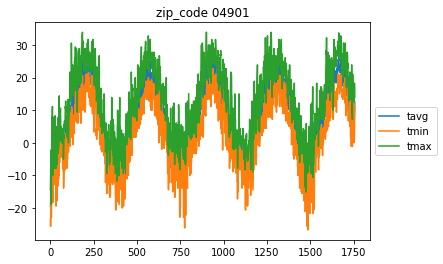

02445


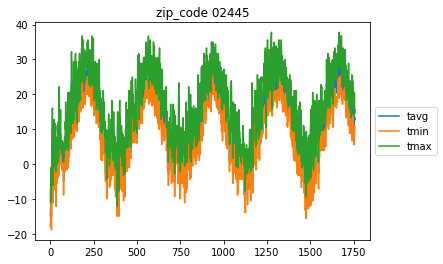

02062


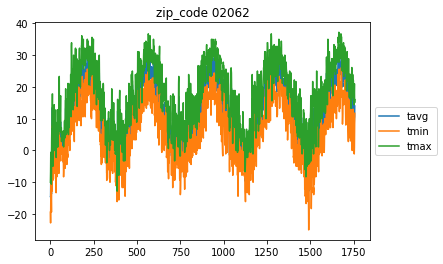

02132


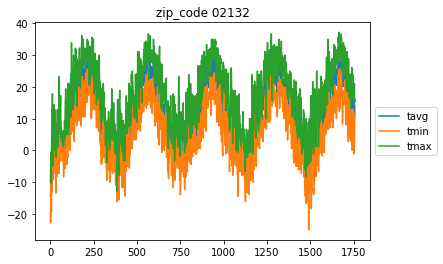

02143


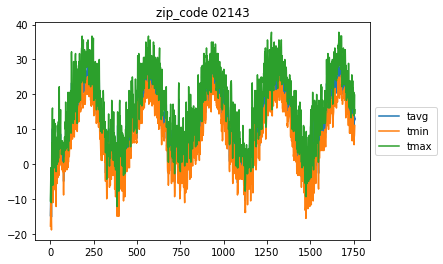

01930


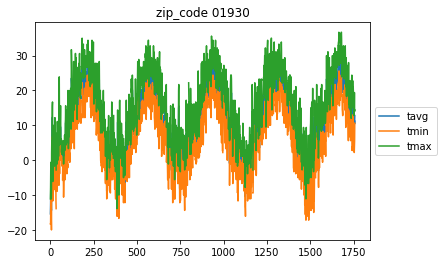

01880


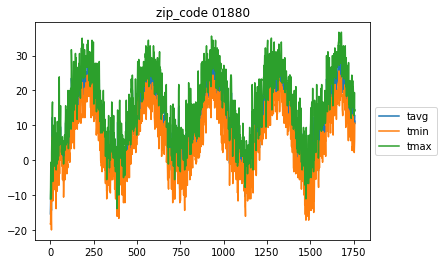

03865


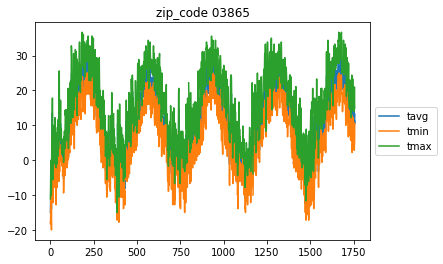

02914


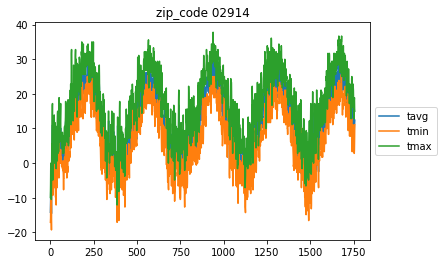

02664


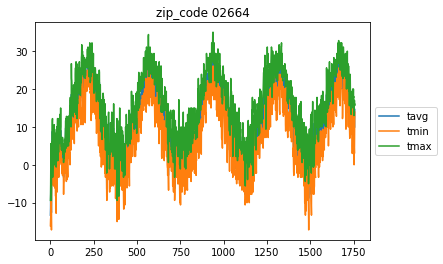

02114


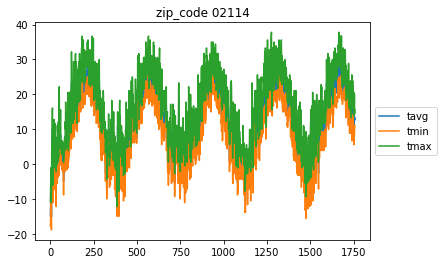

02302


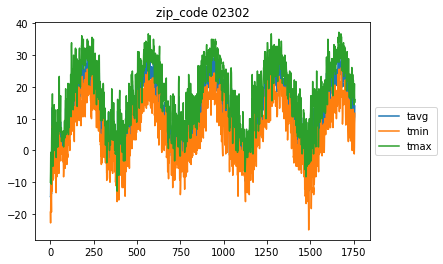

02904


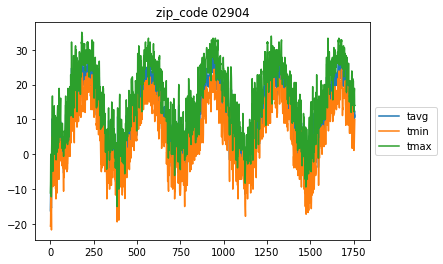

01501


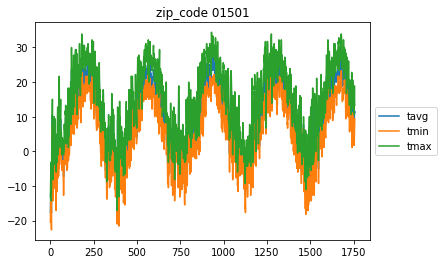

03106


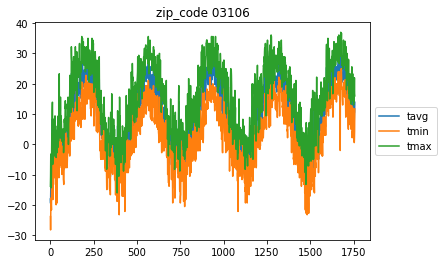

03862


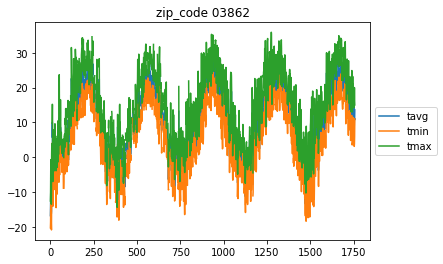

03244


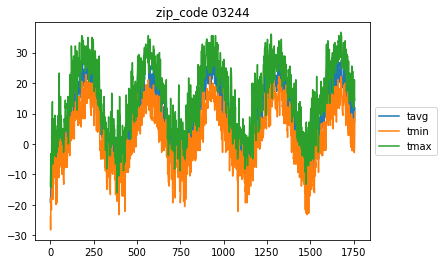

03773


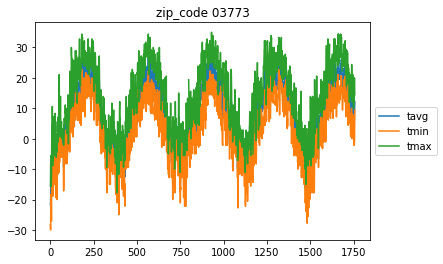

04102


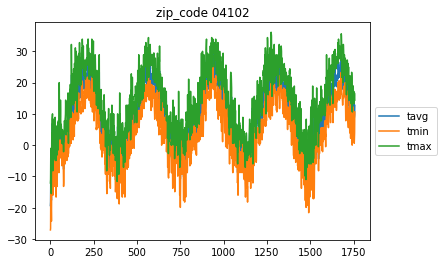

03784


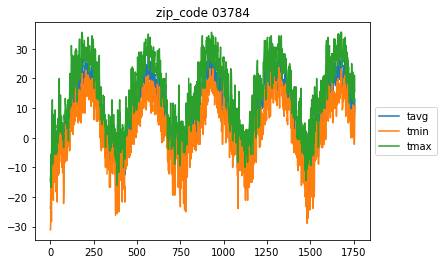

04401


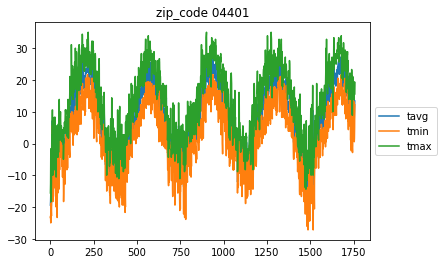

04240


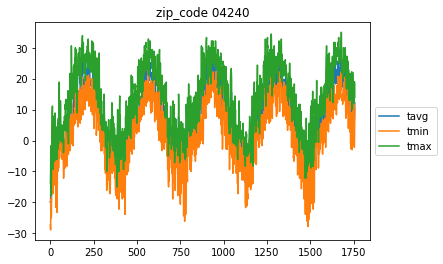

04073


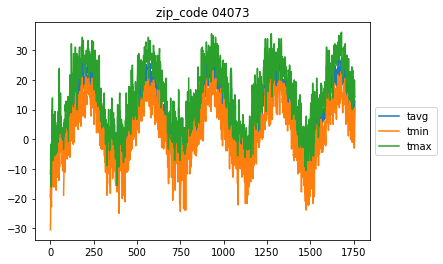

02466


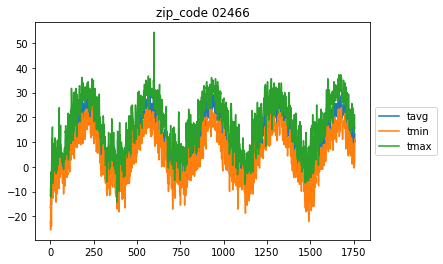

02135


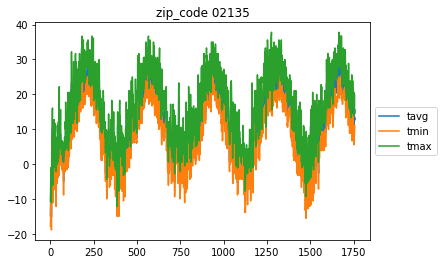

02125


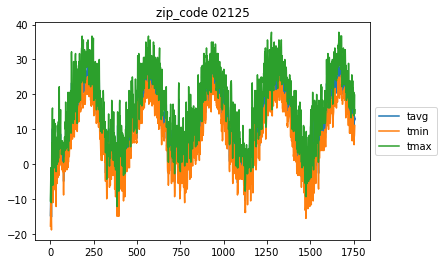

01938


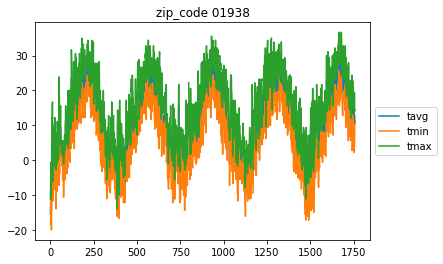

02646


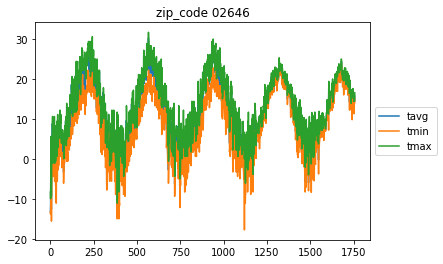

03458


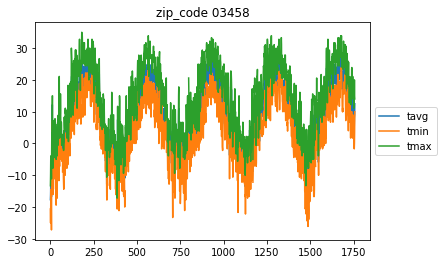

time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2018-01-01 -22.7 -26.7 -18.3   NaN   NaN    NaN  10.3   NaN  1026.9   
1     2018-01-02 -20.6 -30.0  -8.9   NaN   NaN    NaN   6.4   NaN     NaN   
2     2018-01-03 -10.5 -13.9  -7.2   NaN   NaN    NaN  10.2   NaN  1022.1   
3     2018-01-04 -11.9 -15.0  -8.9   NaN   NaN    NaN  12.8   NaN     NaN   
4     2018-01-05 -18.9 -21.7 -11.1   NaN   NaN  315.0  21.6   NaN     NaN   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
1753  2022-10-20   5.9  -1.0  12.2   0.0   NaN  209.0  12.8   NaN  1012.7   
1754  2022-10-21   5.6  -1.7  15.0   0.0   NaN  225.0   6.6   NaN  1019.8   
1755  2022-10-22   8.2   0.0  20.0   0.0   NaN  208.0   7.3   NaN  1024.8   
1756  2022-10-23   9.0   3.3  15.0   1.8   NaN   16.0   3.4   NaN  1027.8   
1757  2022-10-24  12.5  10.0  14.0   1.5   NaN   42.0   6.0   NaN  1024.6   

      tsun      lat    long    zip  
0      NaN  44.2641 -72.577  05602  
1      NaN  44.2641 -72.577  05602  
2      NaN  44.2641 -72.577  05602  
3      NaN  44.2641 -72.577  05602  
4      NaN  44.2641 -72.577  05602  
...    ...      ...     ...    ...  
1753   NaN  42.8856 -71.947  03458  
1754   NaN  42.8856 -71.947  03458  
1755   NaN  42.8856 -71.947  03458  
1756   NaN  42.8856 -71.947  03458  
1757   NaN  42.8856 -71.947  03458  

[236447 rows x 14 columns]

In [24]:
us_zip = pgeocode.Nominatim('us')
temp_df = pd.DataFrame()
addr_weather_df = pd.DataFrame()
lat_long_list = []
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 24)
err_list = []
for zip in df_zip['zipcode'].values.tolist():
    print(zip)
    lat, long = us_zip.query_postal_code(zip)[9:11][0], us_zip.query_postal_code(zip)[9:11][1]
    lat_long_list.append((lat, long))
    location = Point(lat, long)
    data = Daily(location, start, end)
    data = data.fetch()
    if len(data) == 0:
        err_list.append(zip)
        continue
    data.reset_index(inplace = True)
    data['lat'] = lat
    data['long'] = long
    data['zip'] = zip
    addr_weather_df = addr_weather_df.append(data)
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title('zip_code ' + zip)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
addr_weather_df['time'] = addr_weather_df['time'].apply(lambda x : x.strftime("%Y-%m-%d"))
addr_weather_df

# **Error List**

In [36]:
err_list

['04426', '03818', '03584']

Combining weather with weather at a zipcode.

# **Combining Weather Data along with Historical Weather Details**

In [37]:
df_weather_consolidated = pd.merge(df_weather, addr_weather_df, how = 'inner', left_on = ['zip5', 'day_dt'], right_on = ['zip', 'time'])
df_weather_consolidated

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     02747  2019-03-20                  52.2                 21.7       1   
1     02747  2019-03-21                  53.1                 31.7      12   
2     02747  2019-03-22                  45.1                 38.6      18   
3     02747  2019-03-23                  52.2                 32.7      32   
4     02747  2019-03-24                  59.1                 25.7       3   
...     ...         ...                   ...                  ...     ...   
2625  05673  2022-10-20                  53.7                 34.2      17   
2626  05673  2022-10-21                  55.3                 29.9       3   
2627  05673  2022-10-22                  62.3                 35.9       1   
2628  05673  2022-10-23                  62.1                 35.9       3   
2629  05673  2022-10-24                  57.1                 41.6      18   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      22          LOW            17.9   
1                   66               6      30      MINIMAL            32.8   
2                    7               6      32      MINIMAL            29.8   
3                    0               6      30          LOW            35.8   
4                    0               7      30          LOW            32.8   
...                ...             ...     ...          ...             ...   
2625                 0               6       0      MINIMAL            29.8   
2626                 0               6       0      MINIMAL            17.9   
2627                 0               8      20      MINIMAL            14.9   
2628                65               6      20      MINIMAL             3.0   
2629                 5               6      32      MINIMAL             3.0   

      ...  prcp  snow   wdir  wspd  wpgt    pres tsun      lat     long    zip  
0     ...   0.0   NaN    NaN   9.9   NaN  1028.8  NaN  41.6338 -70.9958  02747  
1     ...   0.0   NaN  123.0  13.2   NaN  1020.7  NaN  41.6338 -70.9958  02747  
2     ...   NaN   NaN  333.0  23.2   NaN   992.2  NaN  41.6338 -70.9958  02747  
3     ...   NaN   NaN  283.0  31.6   NaN  1001.4  NaN  41.6338 -70.9958  02747  
4     ...   0.0   NaN    NaN  16.6   NaN  1016.7  NaN  41.6338 -70.9958  02747  
...   ...   ...   ...    ...   ...   ...     ...  ...      ...      ...    ...  
2625  ...   0.0   NaN  197.0  11.8   NaN  1011.7  NaN  44.1889 -72.8283  05673  
2626  ...   0.0   NaN  178.0  10.2   NaN  1019.2  NaN  44.1889 -72.8283  05673  
2627  ...   0.0   NaN  158.0   9.5   NaN  1023.8  NaN  44.1889 -72.8283  05673  
2628  ...   0.0   NaN   30.0   3.0   NaN  1028.7  NaN  44.1889 -72.8283  05673  
2629  ...   0.0   NaN    5.0   3.0   NaN  1025.9  NaN  44.1889 -72.8283  05673  

[2630 rows x 32 columns]

In [38]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

In [39]:
df_weather_consolidated['avg_temperature_amt'] = (df_weather_consolidated['high_temperature_amt'] + df_weather_consolidated['low_temperature_amt'] )/ 2
df_weather_consolidated['historic_tmin'] = df_weather_consolidated['tmin'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tmax'] = df_weather_consolidated['tmax'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tavg'] = df_weather_consolidated['tavg'].apply(lambda x : ((9 * x) / 5) + 32)

In [40]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

# **Combining Weather and Holiday Data Together**

In [41]:
df_weather_consolidated = pd.merge(df_weather_consolidated, df_holiday_combined[df_holiday_combined.level == 'FE'], how = 'left', left_on = 'day_dt', right_on = 'date')
df_weather_consolidated.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'store_id', 'time', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'lat', 'long', 'zip', 'avg_temperature_amt', 'historic_tmin',
       'historic_tmax', 'historic_tavg', 'level', 'year', 'date',
       'holiday_name'],
      dtype='object')

In [42]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

In [43]:
'''
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'date', 'store_id']]
'''
df_weather_consolidated['holiday_ind'] = np.where(df_weather_consolidated['date'].isna(),0,1)
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'holiday_ind', 'store_id']]

In [44]:
df_weather_refined.iloc[0]

zip5                         02747
day_dt                  2019-03-20
high_temperature_amt          52.2
low_temperature_amt           21.7
avg_temperature_amt          36.95
historic_tmin                21.02
historic_tmax                48.02
historic_tavg                35.42
holiday_ind                      0
store_id                       619
Name: 0, dtype: object

In [45]:
df_weather_refined[df_weather_refined.zip5.isin(['02747','05673','05764'])]

zip5      day_dt  high_temperature_amt  low_temperature_amt  \
0     02747  2019-03-20                  52.2                 21.7   
1     02747  2019-03-21                  53.1                 31.7   
2     02747  2019-03-22                  45.1                 38.6   
3     02747  2019-03-23                  52.2                 32.7   
4     02747  2019-03-24                  59.1                 25.7   
...     ...         ...                   ...                  ...   
2625  05673  2022-10-20                  53.7                 34.2   
2626  05673  2022-10-21                  55.3                 29.9   
2627  05673  2022-10-22                  62.3                 35.9   
2628  05673  2022-10-23                  62.1                 35.9   
2629  05673  2022-10-24                  57.1                 41.6   

      avg_temperature_amt  historic_tmin  historic_tmax  historic_tavg  \
0                   36.95          21.02          48.02          35.42   
1                   42.40          26.96          48.02          40.82   
2                   41.85          37.94          44.06          41.18   
3                   42.45          30.92          46.94          38.12   
4                   42.40          26.06          53.06          40.82   
...                   ...            ...            ...            ...   
2625                43.95          37.40          50.00          43.70   
2626                42.60          35.60          57.92          46.22   
2627                49.10          33.98          69.80          51.44   
2628                49.00          37.04          68.00          51.26   
2629                49.35          50.00          60.80          55.58   

      holiday_ind  store_id  
0               0       619  
1               0       619  
2               0       619  
3               0       619  
4               0       619  
...           ...       ...  
2625            0       326  
2626            0       326  
2627            0       326  
2628            0       326  
2629            0       326  

[2630 rows x 10 columns]

In [46]:
df_weather_refined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id'],
      dtype='object')

# **Get Transaction Data at Store-CSC-Day Level**

In [47]:
#df_txn_1 = pd.read_csv('result_txn_1.csv')
#df_txn_2 = pd.read_csv('result_txn_2.csv')
#df_txn_1.columns = [col.lower() for col in df_txn_1.columns]
#df_txn_2.columns = [col.lower() for col in df_txn_2.columns]
df_txn = pd.read_csv('result_txn_619_326_3087.csv')
df_txn.columns = [col.lower() for col in df_txn.columns]
df_txn['eff_price'] = np.where((df_txn['promo_unit_prc'] == 0) | (df_txn['promo_unit_prc'].isna()), df_txn['reg_unit_prc'], df_txn['promo_unit_prc'])
df_txn['promo_depth'] = df_txn['eff_price'] / df_txn['reg_unit_prc']
df_txn.head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0  2020-01-01               146385             25       619          1.99   
1  2020-01-01               146393             25       619          1.99   
2  2020-01-01               146399             25       619          1.99   
3  2020-01-01               146408             25       619          2.69   
4  2020-01-01               146408             25      3087          2.69   

   promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0            1.79             9.95               5               5   
1             NaN            15.92               8               8   
2             NaN            37.81              19              21   
3             NaN             5.38               2               0   
4             NaN            13.45               5               0   

   total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0           -1.00           8.95                       0.0   
1           -2.58          13.34                       0.0   
2           -6.45          31.36                       0.0   
3            0.00           5.38                       0.0   
4            0.00          13.45                       0.0   

   total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                       0.0       1.79     0.899497  
1                       0.0       1.99     1.000000  
2                       0.0       1.99     1.000000  
3                       0.0       2.69     1.000000  
4                       0.0       2.69     1.000000

In [48]:
df_txn[df_txn['promo_depth'] < 1].head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0   2020-01-01               146385             25       619          1.99   
15  2020-01-01               322058             11       619          3.99   
17  2020-01-01               322058             11      3087          3.99   
18  2020-01-01               322060             11       326          4.99   
29  2020-01-01               460913             11       326          4.99   

    promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0             1.79             9.95               5               5   
15            2.99            10.47               3               3   
17            2.99             6.98               2               2   
18            4.69             4.99               1               1   
29            4.69             4.99               1               1   

    total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0             -1.0           8.95                       0.0   
15            -1.5           8.97                       0.0   
17            -1.0           5.98                       0.0   
18            -0.3           4.69                       0.0   
29            -0.3           4.69                       0.0   

    total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                        0.0       1.79     0.899497  
15                       0.0       2.99     0.749373  
17                       0.0       2.99     0.749373  
18                       0.0       4.69     0.939880  
29                       0.0       4.69     0.939880

In [49]:
len(df_txn[['consumer_selling_cd']].drop_duplicates())

33

In [50]:
df_weather_refined['day_dt'].min(), df_txn['txn_dte'].min()

('2019-03-20', '2020-01-01')

In [51]:
df_txn.groupby(['store_id','consumer_selling_cd']).agg({'txn_dte': np.min})

txn_dte
store_id consumer_selling_cd            
326      146399               2020-01-03
         146408               2020-01-03
         146629               2020-01-02
         146761               2020-01-03
         146835               2020-01-03
         147065               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-01
         322087               2020-01-02
         322325               2020-01-03
         322389               2020-01-02
         322390               2020-01-01
         322455               2020-01-02
         410691               2020-01-01
         460651               2020-01-01
         460913               2020-01-01
         461103               2020-12-18
         466564               2020-01-01
         778229               2020-01-01
619      146385               2020-01-01
         146393               2020-01-01
         146399               2020-01-01
         146408               2020-01-01
         146453               2020-01-01
         146629               2020-01-01
         146675               2020-01-01
         146761               2020-01-02
         146835               2020-01-01
         322045               2020-01-01
         322058               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-02
         322087               2020-01-01
         322554               2020-01-01
         322557               2020-01-03
         322625               2020-01-02
         413364               2020-07-12
         460913               2020-01-02
3087     146404               2020-01-01
         146408               2020-01-01
         146453               2020-01-02
         146629               2020-01-01
         146675               2020-01-04
         146761               2020-01-03
         146835               2020-01-01
         322045               2020-01-02
         322058               2020-01-01
         322059               2020-01-02
         322060               2020-01-04
         322082               2020-01-01
         322087               2020-01-04
         322325               2020-01-02
         322554               2020-01-01
         322557               2020-01-01
         437609               2020-01-02
         460913               2020-01-01
         464561               2020-01-02
         778229               2020-01-01

In [52]:
top_csc_list = df_txn['consumer_selling_cd'].drop_duplicates().tolist()
top_csc_list

[146385,
 146393,
 146399,
 146408,
 146404,
 146453,
 146629,
 146675,
 146835,
 147065,
 322045,
 322059,
 322058,
 322060,
 322082,
 322087,
 322390,
 322554,
 322557,
 410691,
 460651,
 460913,
 466564,
 778229,
 146761,
 322325,
 322389,
 322455,
 322625,
 437609,
 464561,
 413364,
 461103]

In [53]:
df_weather_txn_combined = pd.merge(df_weather_refined[df_weather_refined.day_dt >= '2020-01-01'], df_txn, how='inner', left_on=['day_dt', 'store_id'], right_on=['txn_dte', 'store_id'])
df_weather_txn_combined.drop(columns = ['txn_dte'], axis = 1, inplace = True)
df_weather_txn_combined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth'],
      dtype='object')

In [54]:
df_weather_txn_combined.iloc[0]

zip5                             02747
day_dt                      2020-01-01
high_temperature_amt              41.2
low_temperature_amt               29.7
avg_temperature_amt              35.45
historic_tmin                    33.08
historic_tmax                    42.08
historic_tavg                    37.76
holiday_ind                          1
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      1.99
promo_unit_prc                    1.79
total_gross_amt                   9.95
total_item_qty                       5
total_mkdn_qty                       5
total_mkdn_amt                    -1.0
total_net_amt                     8.95
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         1.79
promo_depth                   0.899497
Name: 0, dtype: object

In [55]:
#try with z transformation as well and add info on the dataset
df_weather_txn_combined['log_total_item_qty'] = np.log(df_weather_txn_combined['total_item_qty'] + 1)
df_weather_txn_combined['log_avg_temperature_amt'] = np.log(df_weather_txn_combined['avg_temperature_amt'] + 1)
df_weather_txn_combined['log_historic_tavg'] = np.log(df_weather_txn_combined['historic_tavg'] + 1)
df_weather_txn_combined['log_historic_tmin'] = np.log(df_weather_txn_combined['historic_tmin'] + 1)
df_weather_txn_combined['log_historic_tmax'] = np.log(df_weather_txn_combined['historic_tmax'] + 1)
df_weather_txn_combined['log_eff_price'] = np.log(df_weather_txn_combined['eff_price'] + 1)
df_weather_txn_combined.set_index('day_dt', inplace = True)


In [56]:
df_weather_txn_combined.columns

Index(['zip5', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth', 'log_total_item_qty', 'log_avg_temperature_amt',
       'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax',
       'log_eff_price'],
      dtype='object')

In [57]:
df_weather_txn_combined.iloc[0]

zip5                           02747
high_temperature_amt            41.2
low_temperature_amt             29.7
avg_temperature_amt            35.45
historic_tmin                  33.08
historic_tmax                  42.08
historic_tavg                  37.76
holiday_ind                        1
store_id                         619
consumer_selling_cd           146385
smic_group_cd                     25
reg_unit_prc                    1.99
promo_unit_prc                  1.79
total_gross_amt                 9.95
total_item_qty                     5
total_mkdn_qty                     5
total_mkdn_amt                  -1.0
total_net_amt                   8.95
total_mkdn_wod_alloc_amt         0.0
total_mkdn_pod_alloc_amt         0.0
eff_price                       1.79
promo_depth                 0.899497
log_total_item_qty          1.791759
log_avg_temperature_amt     3.595941
log_historic_tavg           3.657389
log_historic_tmin           3.528711
log_historic_tmax           3.763059
l

In [58]:
orig_df_weather_txn_combined = df_weather_txn_combined.copy()
df_weather_txn_combined = df_weather_txn_combined[['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth', 'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax','log_eff_price', 'log_total_item_qty']]

In [59]:
df_weather_txn_combined.iloc[0]

zip5                          02747
store_id                        619
consumer_selling_cd          146385
promo_depth                0.899497
log_avg_temperature_amt    3.595941
log_historic_tavg          3.657389
log_historic_tmin          3.528711
log_historic_tmax          3.763059
log_eff_price              1.026042
log_total_item_qty         1.791759
Name: 2020-01-01, dtype: object

In [60]:
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined.index
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'])
df_weather_txn_combined['dayofweek'] = df_weather_txn_combined['transaction_date'].dt.dayofweek
df_weather_txn_combined['quarter'] = df_weather_txn_combined['transaction_date'].dt.quarter
df_weather_txn_combined['month'] = df_weather_txn_combined['transaction_date'].dt.month
df_weather_txn_combined['year'] = df_weather_txn_combined['transaction_date'].dt.year
df_weather_txn_combined['dayofyear'] = df_weather_txn_combined['transaction_date'].dt.dayofyear
df_weather_txn_combined['dayofmonth'] = df_weather_txn_combined['transaction_date'].dt.day
df_weather_txn_combined['weekofyear'] = df_weather_txn_combined['transaction_date'].dt.isocalendar().week

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'].astype(str), format='%Y-%m-%d')
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined['transaction_date'].astype(int)

In [62]:
df_weather_txn_combined.drop(columns = ['transaction_date'], axis = 1, inplace=True)

In [63]:
df_weather_txn_combined.iloc[0]

zip5                          02747
store_id                        619
consumer_selling_cd          146385
promo_depth                0.899497
log_avg_temperature_amt    3.595941
log_historic_tavg          3.657389
log_historic_tmin          3.528711
log_historic_tmax          3.763059
log_eff_price              1.026042
log_total_item_qty         1.791759
dayofweek                         2
quarter                           1
month                             1
year                           2020
dayofyear                         1
dayofmonth                        1
weekofyear                        1
Name: 2020-01-01, dtype: object

In [64]:
df_weather_txn_combined.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [65]:
unique_str_csc_list = df_weather_txn_combined[['store_id', 'consumer_selling_cd']].drop_duplicates().values.tolist()
unique_str_csc_list

[[619, 146385],
 [619, 146393],
 [619, 146399],
 [619, 146408],
 [619, 146453],
 [619, 146629],
 [619, 146675],
 [619, 146835],
 [619, 322045],
 [619, 322058],
 [619, 322059],
 [619, 322060],
 [619, 322087],
 [619, 322554],
 [619, 146761],
 [619, 322082],
 [619, 322625],
 [619, 460913],
 [619, 322557],
 [619, 413364],
 [326, 147065],
 [326, 322059],
 [326, 322060],
 [326, 322082],
 [326, 322390],
 [326, 410691],
 [326, 460651],
 [326, 460913],
 [326, 466564],
 [326, 778229],
 [326, 146629],
 [326, 322087],
 [326, 322389],
 [326, 322455],
 [326, 146399],
 [326, 146408],
 [326, 146761],
 [326, 146835],
 [326, 322325],
 [326, 461103]]

# **Obtaining Train, Validation and Test Dates**

In [66]:
unique_date_list = sorted(list(set(list(df_weather_txn_combined.index))))
#test_dates = [dt for dt in unique_date_list if dt >= '2022-07-24' and dt <= '2022-10-22']
#val_dates =  [dt for dt in unique_date_list if dt >= '2022-05-01' and dt <= '2022-07-23']
test_dates = [dt for dt in unique_date_list if dt >= '2022-05-01']
train_dates = [dt for dt in unique_date_list if dt < '2022-05-01']

In [67]:
print(min(train_dates), max(train_dates))
#print(min(val_dates), max(val_dates))
print(min(test_dates), max(test_dates))

2020-01-01 2022-04-30
2022-05-01 2022-10-24


In [68]:
train_indices = df_weather_txn_combined.index.isin(train_dates)
#val_indices = df_weather_txn_combined.index.isin(val_dates)
test_indices = df_weather_txn_combined.index.isin(test_dates)

In [69]:
df_train = df_weather_txn_combined.iloc[train_indices]
#df_val = df_weather_txn_combined.iloc[val_indices]
df_test = df_weather_txn_combined.iloc[test_indices]

In [70]:
print(len(df_train))
#print(len(df_val)) 
print(len(df_test))

24714
4858


In [71]:
df_train.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [72]:
#df_val.columns

In [73]:
df_test.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [74]:
df_train.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2020-01-01  02747       619               146385     0.899497   
2020-01-01  02747       619               146393     1.000000   
2020-01-01  02747       619               146399     1.000000   
2020-01-01  02747       619               146408     1.000000   
2020-01-01  02747       619               146453     1.000000   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2020-01-01           3.763059       1.026042            1.791759          2   
2020-01-01           3.763059       1.095273            2.197225          2   
2020-01-01           3.763059       1.095273            2.995732          2   
2020-01-01           3.763059       1.305626            1.098612          2   
2020-01-01           3.763059       1.305626            0.693147          2   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1

In [75]:
df_test.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2022-05-01  02747       619               146385          1.0   
2022-05-01  02747       619               146393          1.0   
2022-05-01  02747       619               146399          1.0   
2022-05-01  02747       619               146408          1.0   
2022-05-01  02747       619               146453          1.0   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2022-05-01           4.175002       1.190888            2.639057          6   
2022-05-01           4.175002       1.095273            1.945910          6   
2022-05-01           4.175002       1.095273            2.079442          6   
2022-05-01           4.175002       1.566530            1.945910          6   
2022-05-01           4.175002       1.566530            1.609438          6   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17

In [76]:
#df_val.head()

In [77]:
df_train['store_id'].drop_duplicates()

day_dt
2020-01-01    619
2020-01-01    326
Name: store_id, dtype: int64

In [78]:
df_test['store_id'].drop_duplicates()

day_dt
2022-05-01    619
2022-05-01    326
Name: store_id, dtype: int64

In [79]:
#df_val['store_id'].drop_duplicates()

# **WMAPE**

In [80]:
import tensorflow as tf

def weighted_mape(y_true,y_pred):
    tot = tf.reduce_sum(y_true)
    tot = tf.clip_by_value(tot, clip_value_min=1,clip_value_max=1000)
    wmape = tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot)*100#/tot


    return(wmape)

# **Model**

In [81]:
x_cols = [#'zip5', 'store_id', 'consumer_selling_cd', 
          'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 
       'dayofweek', 'quarter', 'month', #'year',
       'dayofyear', 'dayofmonth', 'weekofyear']
y_col = ['log_total_item_qty']

In [82]:
pd.set_option("display.precision", 8)

Processing store :  619
Processing csc :  146385
Length of train data :  810
Length of test data :  171
[14:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:

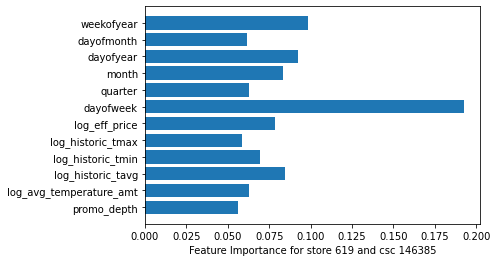

****
Processing store :  619
Processing csc :  146393
Length of train data :  797
Length of test data :  127
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

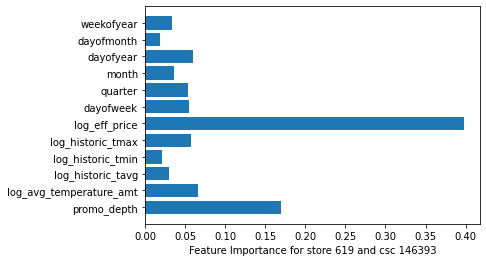

****
Processing store :  619
Processing csc :  146399
Length of train data :  815
Length of test data :  174
[14:11:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

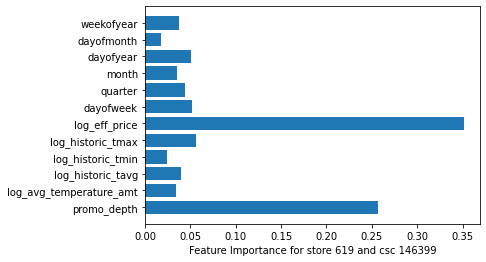

****
Processing store :  619
Processing csc :  146408
Length of train data :  733
Length of test data :  140
[14:11:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

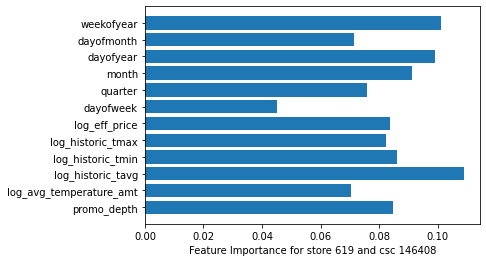

****
Processing store :  619
Processing csc :  146453
Length of train data :  684
Length of test data :  110
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

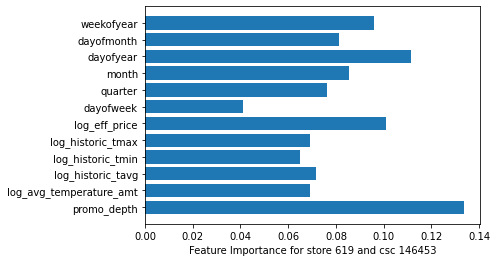

****
Processing store :  619
Processing csc :  146629
Length of train data :  754
Length of test data :  157
[14:12:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

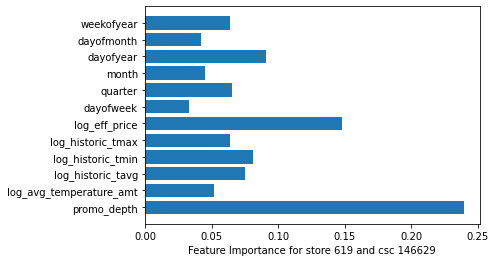

****
Processing store :  619
Processing csc :  146675
Length of train data :  739
Length of test data :  144
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

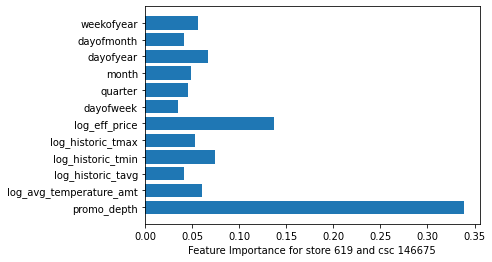

****
Processing store :  619
Processing csc :  146835
Length of train data :  758
Length of test data :  158
[14:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

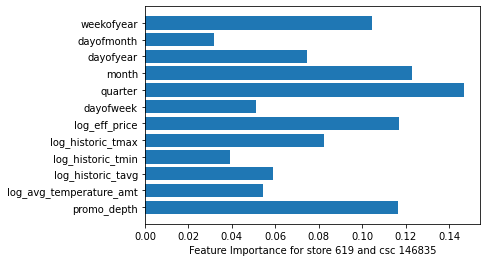

****
Processing store :  619
Processing csc :  322045
Length of train data :  787
Length of test data :  151
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

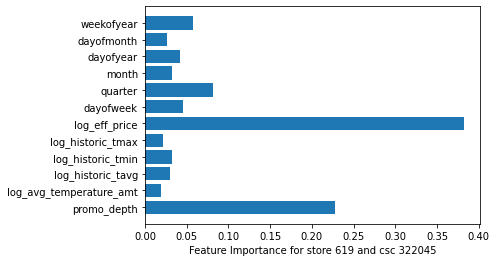

****
Processing store :  619
Processing csc :  322058
Length of train data :  816
Length of test data :  172
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

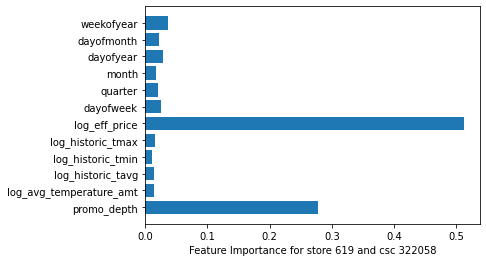

****
Processing store :  619
Processing csc :  322059
Length of train data :  803
Length of test data :  169
[14:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

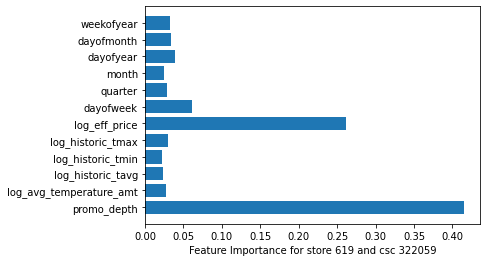

****
Processing store :  619
Processing csc :  322060
Length of train data :  770
Length of test data :  163
[14:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

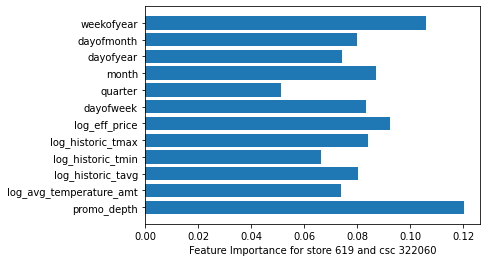

****
Processing store :  619
Processing csc :  322087
Length of train data :  810
Length of test data :  172
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

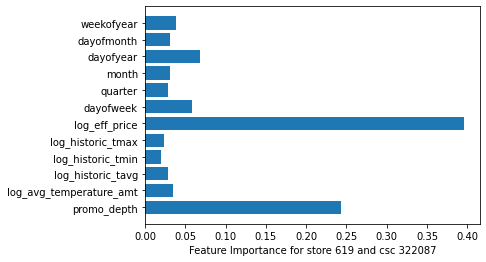

****
Processing store :  619
Processing csc :  322554
Length of train data :  784
Length of test data :  160
[14:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

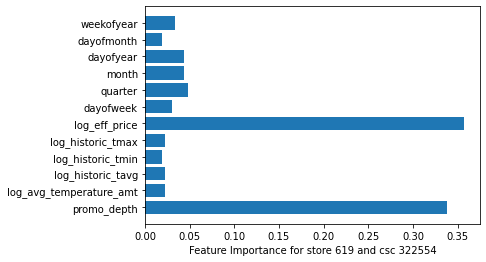

****
Processing store :  619
Processing csc :  146761
Length of train data :  700
Length of test data :  128
[14:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

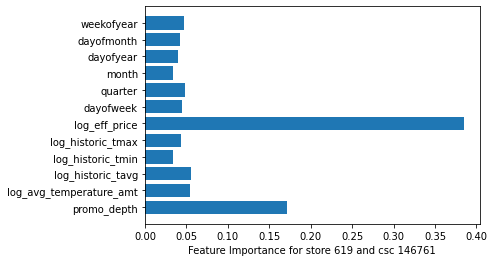

****
Processing store :  619
Processing csc :  322082
Length of train data :  797
Length of test data :  173
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

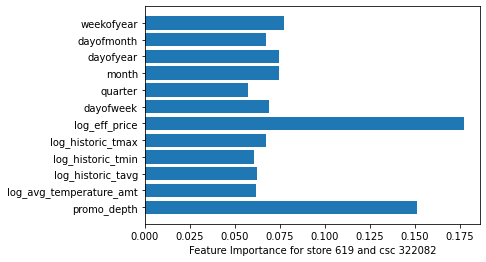

****
Processing store :  619
Processing csc :  322625
Length of train data :  746
Length of test data :  163
[14:19:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

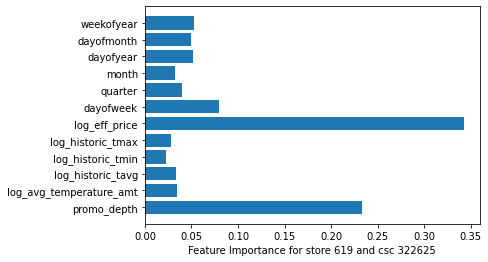

****
Processing store :  619
Processing csc :  460913
Length of train data :  761
Length of test data :  153
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

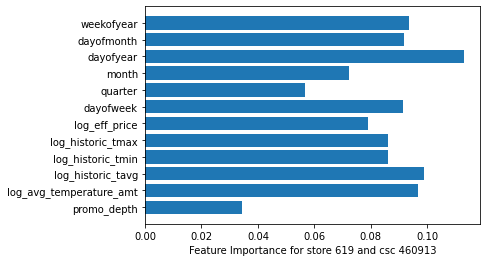

****
Processing store :  619
Processing csc :  322557
Length of train data :  807
Length of test data :  191
[14:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

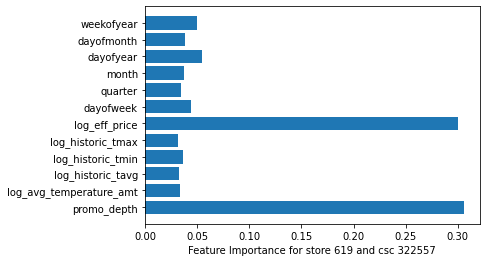

****
Processing store :  619
Processing csc :  413364
Length of train data :  580
Length of test data :  146
[14:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

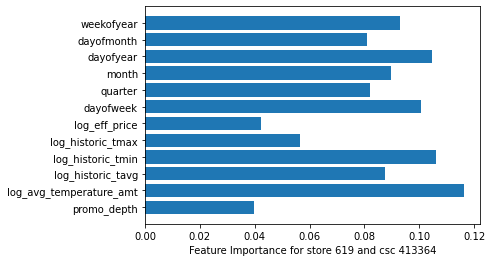

****
Processing store :  326
Processing csc :  147065
Length of train data :  389
Length of test data :  93
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

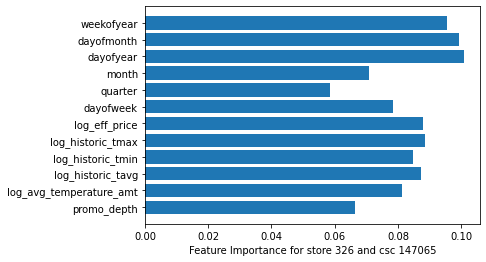

****
Processing store :  326
Processing csc :  322059
Length of train data :  601
Length of test data :  130
[14:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

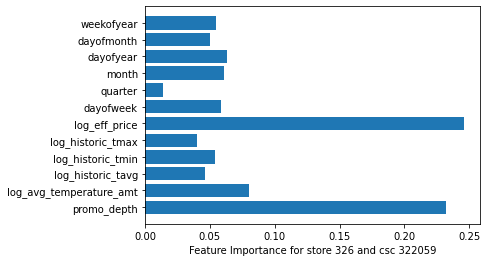

****
Processing store :  326
Processing csc :  322060
Length of train data :  582
Length of test data :  101
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

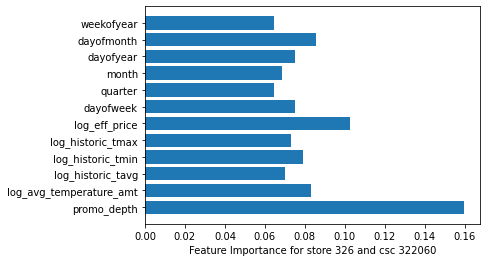

****
Processing store :  326
Processing csc :  322082
Length of train data :  531
Length of test data :  102
[14:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

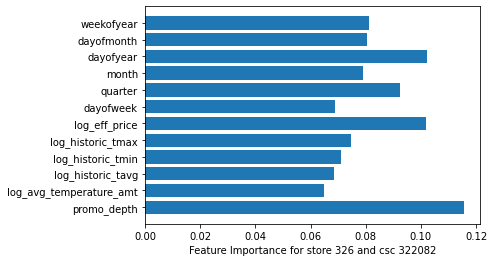

****
Processing store :  326
Processing csc :  322390
Length of train data :  405
Length of test data :  50
[14:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

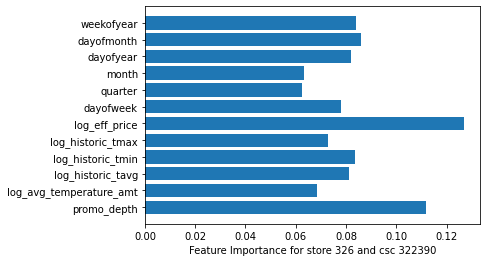

****
Processing store :  326
Processing csc :  410691
Length of train data :  550
Length of test data :  163
[14:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

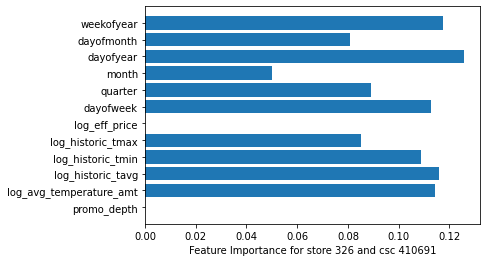

****
Processing store :  326
Processing csc :  460651
Length of train data :  472
Length of test data :  114
[14:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

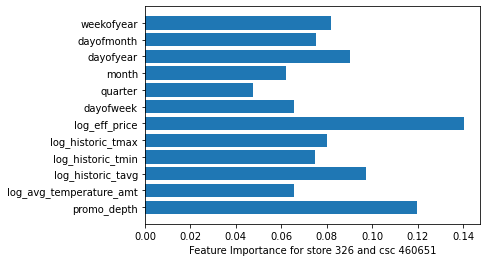

****
Processing store :  326
Processing csc :  460913
Length of train data :  691
Length of test data :  107
[14:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

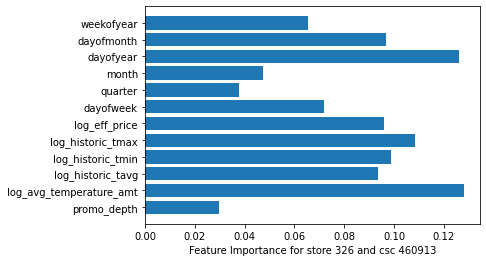

****
Processing store :  326
Processing csc :  466564
Length of train data :  499
Length of test data :  77
[14:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

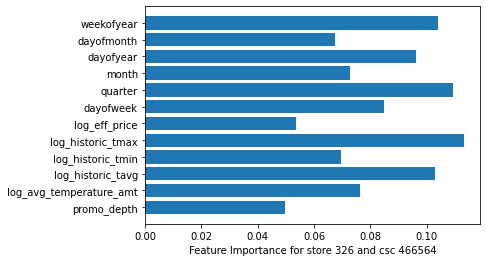

****
Processing store :  326
Processing csc :  778229
Length of train data :  402
Length of test data :  30
[14:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

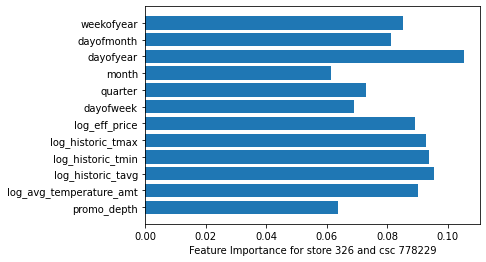

****
Processing store :  326
Processing csc :  146629
Length of train data :  535
Length of test data :  101
[14:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

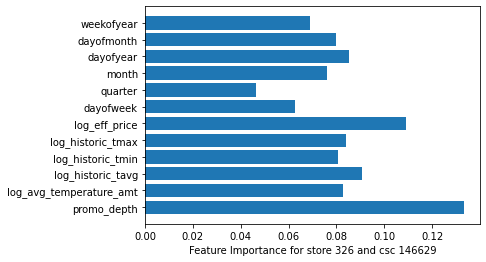

****
Processing store :  326
Processing csc :  322087
Length of train data :  523
Length of test data :  133
[14:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

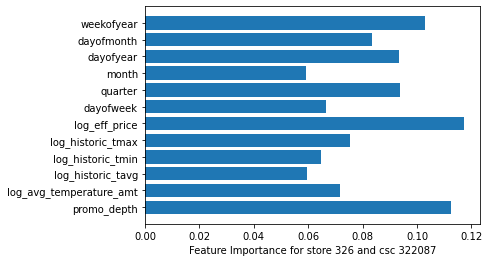

****
Processing store :  326
Processing csc :  322389
Length of train data :  448
Length of test data :  105
[14:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

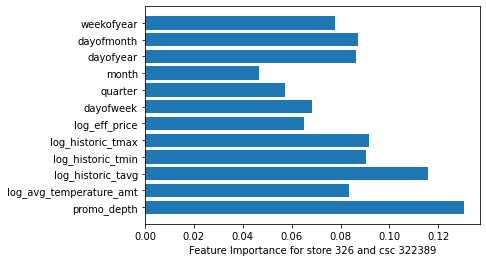

****
Processing store :  326
Processing csc :  322455
Length of train data :  476
Length of test data :  72
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

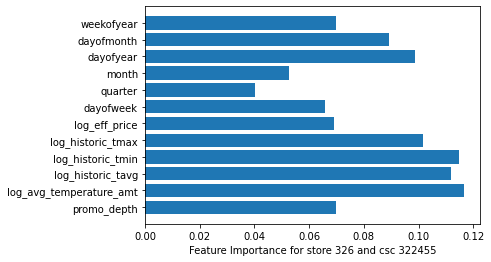

****
Processing store :  326
Processing csc :  146399
Length of train data :  472
Length of test data :  73
[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

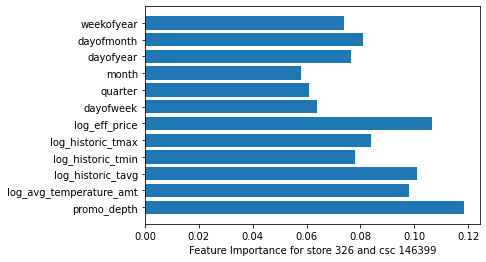

****
Processing store :  326
Processing csc :  146408
Length of train data :  391
Length of test data :  56
[14:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

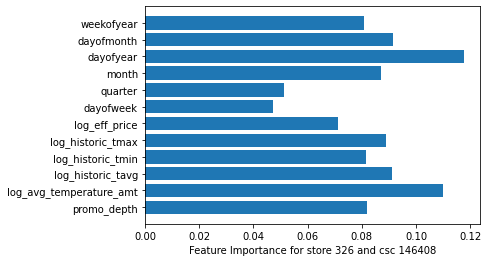

****
Processing store :  326
Processing csc :  146761
Length of train data :  346
Length of test data :  61
[14:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

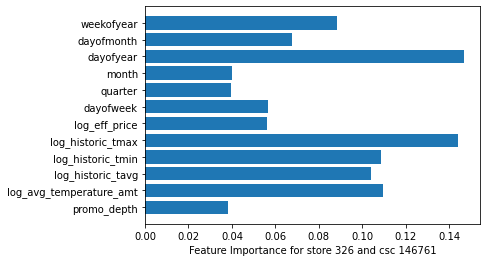

****
Processing store :  326
Processing csc :  146835
Length of train data :  412
Length of test data :  39
[14:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:27:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

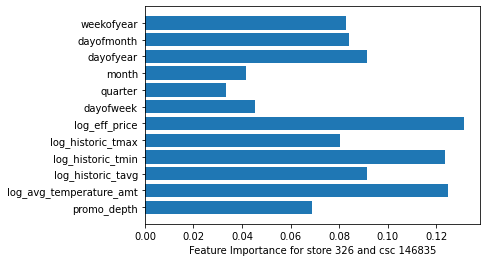

****
Processing store :  326
Processing csc :  322325
Length of train data :  529
Length of test data :  97
[14:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

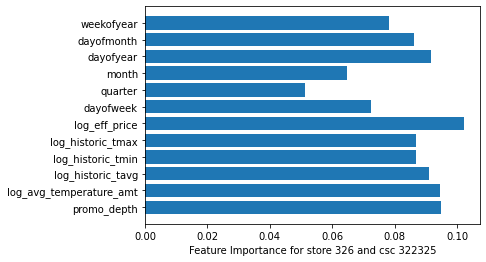

****
Processing store :  326
Processing csc :  461103
Length of train data :  209
Length of test data :  32
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14

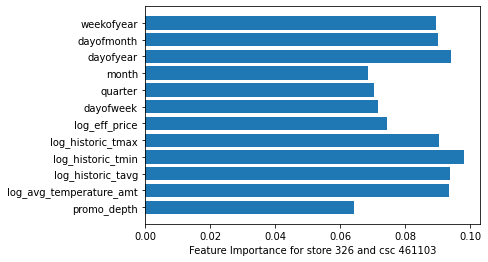

****


In [89]:
#val_wmape_list = []
test_wmape_list = []
feature_importance_list = []
#df_val_actual_vs_predicted = pd.DataFrame()
df_test_actual_vs_predicted = pd.DataFrame()

for e in unique_str_csc_list:

    store, csc = e[0], e[1]
    print("Processing store : ", store)
    print("Processing csc : ", csc)

    print("Length of train data : ", len(df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]))
    print("Length of test data : ", len(df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]))
    #print("Length of val data : ", len(df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]))
    
    df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
    df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]
    #df_val_modified = df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]

    train_indices = df_train_modified.index
    test_indices = df_test_modified.index
    #val_indices = df_val_modified.index

    X_train = df_train_modified[x_cols].values
    y_train = df_train_modified[y_col].values

    #X_val = df_val_modified[x_cols].values
    #y_val = df_val_modified[y_col].values

    X_test = df_test_modified[x_cols].values
    y_test = df_test_modified[y_col].values

    #xgboost_reg_1 = xgboost.XGBRegressor(n_estimators=100, max_depth = 5)# for val
    xgboost_reg_2 = xgboost.XGBRegressor(seed=20)# for test
    
    #xgboost_reg_1.fit(X_train, y_train,
    #    eval_set=[(X_train, y_train), (X_val, y_val)],
    #    early_stopping_rounds=50,
    #    verbose=False) 
    
    '''
    xgboost_reg_2.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) 
    dmatrix = xgboost_reg_2.DMatrix(data=X_train, label=y_train)
    #params={'objective':'reg:squarederror'}
    '''
    params = { 'max_depth': [3, 5, 6, 10, 15, 20],
               'learning_rate': [0.01, 0.1, 0.2, 0.3],
               'subsample': np.arange(0.5, 1.0, 0.1),
               'colsample_bytree': np.arange(0.4, 1.0, 0.1),
               'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
               'n_estimators': [50, 100, 500, 1000]}
    clf = RandomizedSearchCV(estimator=xgboost_reg_2,
                             param_distributions=params,
                             scoring='neg_mean_squared_error',
                             n_iter=25,
                             verbose=0)
    clf.fit(X_train, y_train)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
    #print("Feature importance for validation set of ", e)
    #_ = plot_importance(xgboost_reg_1, height=0.9)
    
    #print("Feature importance for test set of ", e)
    #_ = plot_importance(xgboost_reg_2, height=0.9)
    
    #y_val_predicted = xgboost_reg_1.predict(X_val)
    
    y_test_predicted = clf.predict(X_test)

    #y_val_combined = pd.DataFrame(y_val, y_val_predicted).reset_index()
    #y_val_combined.columns = ['y_val_actual', 'y_val_predicted']
    #y_val_combined['store_id'] = store
    #y_val_combined['csc'] = csc
    #y_val_combined.index = val_indices
    #val_wmape = weighted_mape(y_val_combined['y_val_actual'], y_val_combined['y_val_predicted']).numpy()
    #print("Validation wmape :", val_wmape)
    #print(y_val_combined)
    #y_val_combined.to_csv('val_pred_' + "{}".format(store) + '_' + "{}".format(csc) + '.csv')
    #val_wmape_list.append((store, csc, val_wmape))
    #df_val_actual_vs_predicted = pd.concat([y_val_combined, df_val_actual_vs_predicted])
    
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices
    test_wmape = weighted_mape(y_test_combined['y_test_actual'], y_test_combined['y_test_predicted']).numpy()
    print("Test wmape : ", test_wmape)
    store_csc_list = [store, csc]
    feature_importance_list.append(store_csc_list + list(clf.best_estimator_.feature_importances_))
    plt.barh(x_cols, clf.best_estimator_.feature_importances_)
    plt.xlabel("Feature Importance for store " + str(store) + " and csc " + str(csc))
    plt.show(block = False)

    #print(y_test)
    #print("%%%%")
    #print(y_test_predicted)
    #print("*******************************")
    #print(y_test_combined)
    #y_test_combined.to_csv('test_pred_' + "{}".format(store) + '_' + "{}".format(csc) + '.csv')
    test_wmape_list.append((store, csc, test_wmape))
    df_test_actual_vs_predicted = pd.concat([df_test_actual_vs_predicted, y_test_combined])
    print("****")
    #print(df_test_actual_vs_predicted)
    #print("^^^^^^^^^")
    

In [90]:
df_feature_importance = pd.DataFrame(feature_importance_list)
df_feature_importance.columns = ['store_id', 'csc'] + [col + '_feature_importance' for col in x_cols]
df_feature_importance

store_id     csc  promo_depth_feature_importance  \
0        619  146385                      0.05636090   
1        619  146393                      0.16935363   
2        619  146399                      0.25678927   
3        619  146408                      0.08464476   
4        619  146453                      0.13353945   
5        619  146629                      0.23939916   
6        619  146675                      0.33857480   
7        619  146835                      0.11646486   
8        619  322045                      0.22741479   
9        619  322058                      0.27736178   
10       619  322059                      0.41474646   
11       619  322060                      0.12025347   
12       619  322087                      0.24304569   
13       619  322554                      0.33807895   
14       619  146761                      0.17153123   
15       619  322082                      0.15102218   
16       619  322625                      0.23330250   
17       619  460913                      0.03421608   
18       619  322557                      0.30576670   
19       619  413364                      0.03989945   
20       326  147065                      0.06655597   
21       326  322059                      0.23205256   
22       326  322060                      0.15951242   
23       326  322082                      0.11553945   
24       326  322390                      0.11190217   
25       326  410691                      0.00000000   
26       326  460651                      0.11953300   
27       326  460913                      0.02975009   
28       326  466564                      0.04966780   
29       326  778229                      0.06384523   
30       326  146629                      0.13325547   
31       326  322087                      0.11238501   
32       326  322389                      0.13041951   
33       326  322455                      0.06967542   
34       326  146399                      0.11836359   
35       326  146408                      0.08184076   
36       326  146761                      0.03802333   
37       326  146835                      0.06894581   
38       326  322325                      0.09491163   
39       326  461103                      0.06439347   

    log_avg_temperature_amt_feature_importance  \
0                                   0.06289811   
1                                   0.06662508   
2                                   0.03468553   
3                                   0.07033111   
4                                   0.06894767   
5                                   0.05219067   
6                                   0.06099952   
7                                   0.05437345   
8                                   0.01931475   
9                                   0.01523493   
10                                  0.02712787   
11                                  0.07400544   
12                                  0.03486653   
13                                  0.02284969   
14                                  0.05428342   
15                                  0.06153839   
16                                  0.03400286   
17                                  0.09672720   
18                                  0.03363459   
19                                  0.11625995   
20                                  0.08127261   
21                                  0.08051752   
22                                  0.08329395   
23                                  0.06474625   
24                                  0.06839833   
25                                  0.11434586   
26                                  0.06562751   
27                                  0.12801209   
28                                  0.07631800   
29                                  0.09017741   
30                                  0.08294143   
31                                  0.07169114   
32                                  0.08349049   
33     

In [91]:
df_feature_importance.sort_values(by = ['log_historic_tavg_feature_importance'], ascending = False)

store_id     csc  promo_depth_feature_importance  \
25       326  410691                      0.00000000   
32       326  322389                      0.13041951   
33       326  322455                      0.06967542   
3        619  146408                      0.08464476   
36       326  146761                      0.03802333   
28       326  466564                      0.04966780   
34       326  146399                      0.11836359   
17       619  460913                      0.03421608   
26       326  460651                      0.11953300   
29       326  778229                      0.06384523   
39       326  461103                      0.06439347   
27       326  460913                      0.02975009   
37       326  146835                      0.06894581   
35       326  146408                      0.08184076   
38       326  322325                      0.09491163   
30       326  146629                      0.13325547   
19       619  413364                      0.03989945   
20       326  147065                      0.06655597   
0        619  146385                      0.05636090   
24       326  322390                      0.11190217   
11       619  322060                      0.12025347   
5        619  146629                      0.23939916   
4        619  146453                      0.13353945   
22       326  322060                      0.15951242   
23       326  322082                      0.11553945   
15       619  322082                      0.15102218   
31       326  322087                      0.11238501   
7        619  146835                      0.11646486   
14       619  146761                      0.17153123   
21       326  322059                      0.23205256   
6        619  146675                      0.33857480   
2        619  146399                      0.25678927   
16       619  322625                      0.23330250   
18       619  322557                      0.30576670   
8        619  322045                      0.22741479   
1        619  146393                      0.16935363   
12       619  322087                      0.24304569   
10       619  322059                      0.41474646   
13       619  322554                      0.33807895   
9        619  322058                      0.27736178   

    log_avg_temperature_amt_feature_importance  \
25                                  0.11434586   
32                                  0.08349049   
33                                  0.11652492   
3                                   0.07033111   
36                                  0.10970804   
28                                  0.07631800   
34                                  0.09820232   
17                                  0.09672720   
26                                  0.06562751   
29                                  0.09017741   
39                                  0.09365727   
27                                  0.12801209   
37                                  0.12491728   
35                                  0.11008047   
38                                  0.09458102   
30                                  0.08294143   
19                                  0.11625995   
20                                  0.08127261   
0                                   0.06289811   
24                                  0.06839833   
11                                  0.07400544   
5                                   0.05219067   
4                                   0.06894767   
22                                  0.08329395   
23                                  0.06474625   
15                                  0.06153839   
31                                  0.07169114   
7                                   0.05437345   
14                                  0.05428342   
21                                  0.08051752   
6                                   0.06099952   
2                                   0.03468553   
16                                  0.03400286   
18     

In [108]:
df_feature_importance[(df_feature_importance.store_id == 619) & (df_feature_importance.csc == 322045)].iloc[0]

store_id                                         619.00000000
csc                                           322045.00000000
promo_depth_feature_importance                     0.22741479
log_avg_temperature_amt_feature_importance         0.01931475
log_historic_tavg_feature_importance               0.03028931
log_historic_tmin_feature_importance               0.03297339
log_historic_tmax_feature_importance               0.02168489
log_eff_price_feature_importance                   0.38195974
dayofweek_feature_importance                       0.04502764
quarter_feature_importance                         0.08208498
month_feature_importance                           0.03268720
dayofyear_feature_importance                       0.04218329
dayofmonth_feature_importance                      0.02694598
weekofyear_feature_importance                      0.05743403
Name: 8, dtype: float64

In [109]:
df_feature_importance[(df_feature_importance.store_id == 619) & (df_feature_importance.csc == 322087)].iloc[0]

store_id                                         619.00000000
csc                                           322087.00000000
promo_depth_feature_importance                     0.24304569
log_avg_temperature_amt_feature_importance         0.03486653
log_historic_tavg_feature_importance               0.02840097
log_historic_tmin_feature_importance               0.01936700
log_historic_tmax_feature_importance               0.02407434
log_eff_price_feature_importance                   0.39562702
dayofweek_feature_importance                       0.05818753
quarter_feature_importance                         0.02829080
month_feature_importance                           0.03157447
dayofyear_feature_importance                       0.06787979
dayofmonth_feature_importance                      0.03054869
weekofyear_feature_importance                      0.03813714
Name: 12, dtype: float64

In [92]:
df_txn[df_txn.consumer_selling_cd == 461103]['smic_group_cd'].drop_duplicates()

14359    25
Name: smic_group_cd, dtype: int64

In [93]:
df_txn[df_txn.consumer_selling_cd == 322455]['smic_group_cd'].drop_duplicates()

61    11
Name: smic_group_cd, dtype: int64

In [94]:
df_test_actual_vs_predicted

y_test_actual  y_test_predicted  store_id     csc
day_dt                                                       
2022-05-01     2.63905733        2.02932191       619  146385
2022-05-02     1.60943791        1.82861185       619  146385
2022-05-03     2.19722458        1.55914950       619  146385
2022-05-04     2.30258509        1.65154541       619  146385
2022-05-05     1.60943791        1.77131045       619  146385
...                   ...               ...       ...     ...
2022-08-11     1.09861229        1.01354945       326  461103
2022-08-14     0.69314718        0.94245243       326  461103
2022-08-17     1.38629436        0.90114915       326  461103
2022-08-19     0.69314718        0.93299830       326  461103
2022-08-20     1.38629436        0.94028592       326  461103

[4858 rows x 4 columns]

In [95]:
df_test_wmape = pd.DataFrame(test_wmape_list, columns = ['store_id', 'csc', 'test_wmape'])
df_test_wmape['test_accuracy'] = 100 - df_test_wmape['test_wmape']
#df_val_wmape = pd.DataFrame(val_wmape_list, columns = ['store_id', 'csc', 'val_wmape'])
#df_val_wmape['val_accuracy'] = 100 - df_val_wmape['val_wmape']

In [96]:
df_test_wmape.sort_values(by=['test_accuracy'], ascending = False)

store_id     csc   test_wmape  test_accuracy
12       619  322087  18.76962722    81.23037278
15       619  322082  20.67448079    79.32551921
10       619  322059  21.95102898    78.04897102
2        619  146399  22.17275301    77.82724699
38       326  322325  23.18326355    76.81673645
9        619  322058  23.41311806    76.58688194
13       619  322554  23.44938712    76.55061288
18       619  322557  23.87917264    76.12082736
0        619  146385  24.10875253    75.89124747
8        619  322045  24.66465946    75.33534054
6        619  146675  25.87013537    74.12986463
25       326  410691  26.08930543    73.91069457
5        619  146629  26.68250340    73.31749660
14       619  146761  26.99830546    73.00169454
39       326  461103  27.11188104    72.88811896
34       326  146399  27.26971231    72.73028769
1        619  146393  27.37872767    72.62127233
36       326  146761  27.38259821    72.61740179
24       326  322390  27.90494343    72.09505657
29       326  778229  28.08685174    71.91314826
30       326  146629  28.78599206    71.21400794
33       326  322455  29.29740092    70.70259908
35       326  146408  29.63300576    70.36699424
19       619  413364  29.75642630    70.24357370
20       326  147065  30.14736396    69.85263604
22       326  322060  30.35765608    69.64234392
26       326  460651  30.43428680    69.56571320
23       326  322082  30.89040515    69.10959485
37       326  146835  31.09486995    68.90513005
7        619  146835  31.40817851    68.59182149
31       326  322087  32.50619477    67.49380523
28       326  466564  32.59228900    67.40771100
32       326  322389  32.72751795    67.27248205
11       619  322060  33.01760808    66.98239192
21       326  322059  33.14327644    66.85672356
17       619  460913  33.48933407    66.51066593
4        619  146453  33.65321505    66.34678495
27       326  460913  34.45510051    65.54489949
3        619  146408  35.46832740    64.53167260
16       619  322625  38.31075609    61.68924391

In [ ]:
#df_val_wmape.sort_values(by=['val_accuracy'], ascending = False)

In [97]:
np.exp(1.92986488)-1, np.exp(2.63905733)-1, np.log(5.88857942 + 1)

(5.88857939384694, 13.00000000538638, 1.9298648837965826)

In [98]:
df_test_actual_vs_predicted

y_test_actual  y_test_predicted  store_id     csc
day_dt                                                       
2022-05-01     2.63905733        2.02932191       619  146385
2022-05-02     1.60943791        1.82861185       619  146385
2022-05-03     2.19722458        1.55914950       619  146385
2022-05-04     2.30258509        1.65154541       619  146385
2022-05-05     1.60943791        1.77131045       619  146385
...                   ...               ...       ...     ...
2022-08-11     1.09861229        1.01354945       326  461103
2022-08-14     0.69314718        0.94245243       326  461103
2022-08-17     1.38629436        0.90114915       326  461103
2022-08-19     0.69314718        0.93299830       326  461103
2022-08-20     1.38629436        0.94028592       326  461103

[4858 rows x 4 columns]

In [99]:
df_test_actual_vs_predicted['y_test_actual_transformed'] = df_test_actual_vs_predicted['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted['y_test_predicted_transformed'] = df_test_actual_vs_predicted['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted

y_test_actual  y_test_predicted  store_id     csc  \
day_dt                                                          
2022-05-01     2.63905733        2.02932191       619  146385   
2022-05-02     1.60943791        1.82861185       619  146385   
2022-05-03     2.19722458        1.55914950       619  146385   
2022-05-04     2.30258509        1.65154541       619  146385   
2022-05-05     1.60943791        1.77131045       619  146385   
...                   ...               ...       ...     ...   
2022-08-11     1.09861229        1.01354945       326  461103   
2022-08-14     0.69314718        0.94245243       326  461103   
2022-08-17     1.38629436        0.90114915       326  461103   
2022-08-19     0.69314718        0.93299830       326  461103   
2022-08-20     1.38629436        0.94028592       326  461103   

            y_test_actual_transformed  y_test_predicted_transformed  
day_dt                                                               
2022-05-01                       13.0                           7.0  
2022-05-02                        4.0                           5.0  
2022-05-03                        8.0                           4.0  
2022-05-04                        9.0                           4.0  
2022-05-05                        4.0                           5.0  
...                               ...                           ...  
2022-08-11                        2.0                           2.0  
2022-08-14                        1.0                           2.0  
2022-08-17                        3.0                           1.0  
2022-08-19                        1.0                           2.0  
2022-08-20                        3.0                           2.0  

[4858 rows x 6 columns]

In [112]:
df_test_actual_vs_predicted[['store_id', 'csc', 'y_test_actual_transformed', 'y_test_predicted_transformed']].values.tolist()

[[619.0, 146385.0, 13.0, 7.0],
 [619.0, 146385.0, 4.0, 5.0],
 [619.0, 146385.0, 8.0, 4.0],
 [619.0, 146385.0, 9.0, 4.0],
 [619.0, 146385.0, 4.0, 5.0],
 [619.0, 146385.0, 6.0, 6.0],
 [619.0, 146385.0, 8.0, 6.0],
 [619.0, 146385.0, 7.0, 6.0],
 [619.0, 146385.0, 1.0, 4.0],
 [619.0, 146385.0, 7.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 1.0, 4.0],
 [619.0, 146385.0, 7.0, 5.0],
 [619.0, 146385.0, 10.0, 5.0],
 [619.0, 146385.0, 7.0, 5.0],
 [619.0, 146385.0, 4.0, 3.0],
 [619.0, 146385.0, 4.0, 3.0],
 [619.0, 146385.0, 6.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 3.0, 6.0],
 [619.0, 146385.0, 3.0, 5.0],
 [619.0, 146385.0, 4.0, 5.0],
 [619.0, 146385.0, 5.0, 3.0],
 [619.0, 146385.0, 8.0, 4.0],
 [619.0, 146385.0, 2.0, 5.0],
 [619.0, 146385.0, 3.0, 4.0],
 [619.0, 146385.0, 7.0, 5.0],
 [619.0, 146385.0, 7.0, 5.0],
 [619.0, 146385.0, 1.0, 5.0],
 [619.0, 146385.0, 8.0, 4.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0, 146385.0, 2.0, 5.0],
 [619.0, 146385.0, 2.0, 4.0],
 [619.0,

In [119]:
wmape_list = []
for e in df_test_actual_vs_predicted[['store_id', 'csc']].drop_duplicates().values.tolist():
    store_id = e[0]
    csc = e[1]
    wmape_val = weighted_mape(df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == store_id) & (df_test_actual_vs_predicted.csc == csc)]['y_test_actual'], 
                              df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == store_id) & (df_test_actual_vs_predicted.csc == csc)]['y_test_predicted']
                             ).numpy()
    accuracy_val = 100 - wmape_val                         
    wmape_list.append((store_id, csc, wmape_val, accuracy_val))
df_wmape = pd.DataFrame(wmape_list, columns = ['store_id', 'csc', 'wmape_val', 'accuracy_val'])
df_wmape.sort_values(by=['accuracy_val'], ascending = False)
df_wmape.to_csv('wmape.csv', index = False)

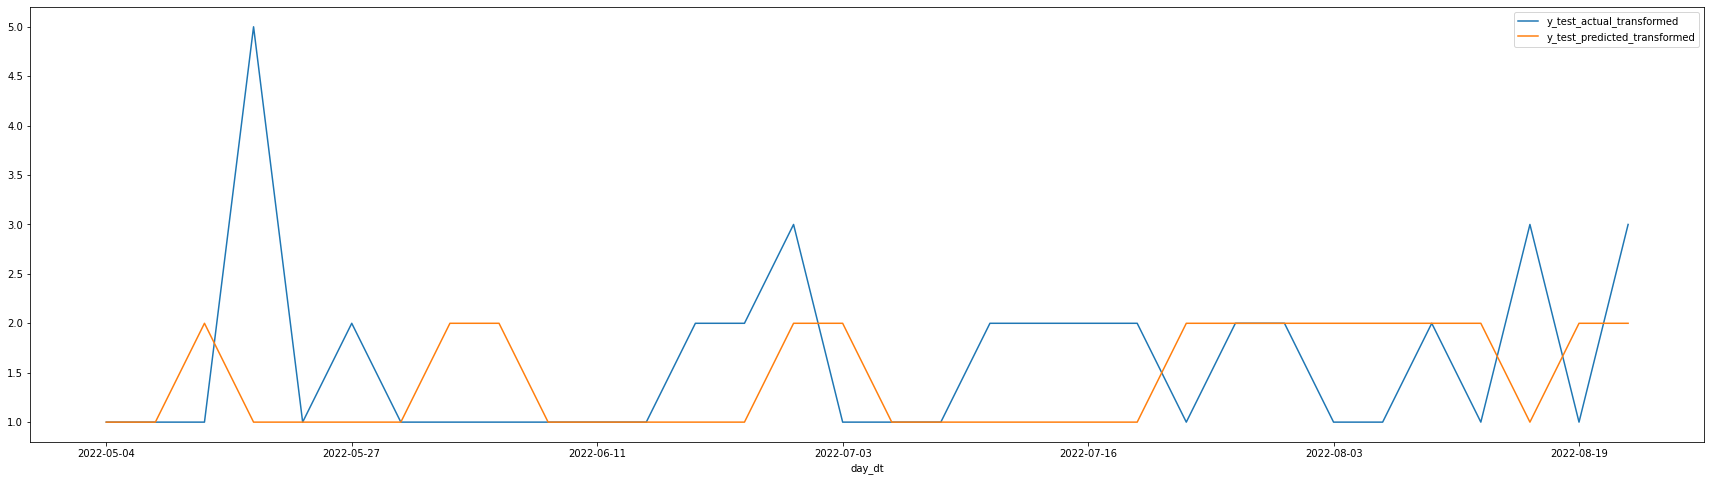

In [100]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 326) & (df_test_actual_vs_predicted.csc.isin([461103]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

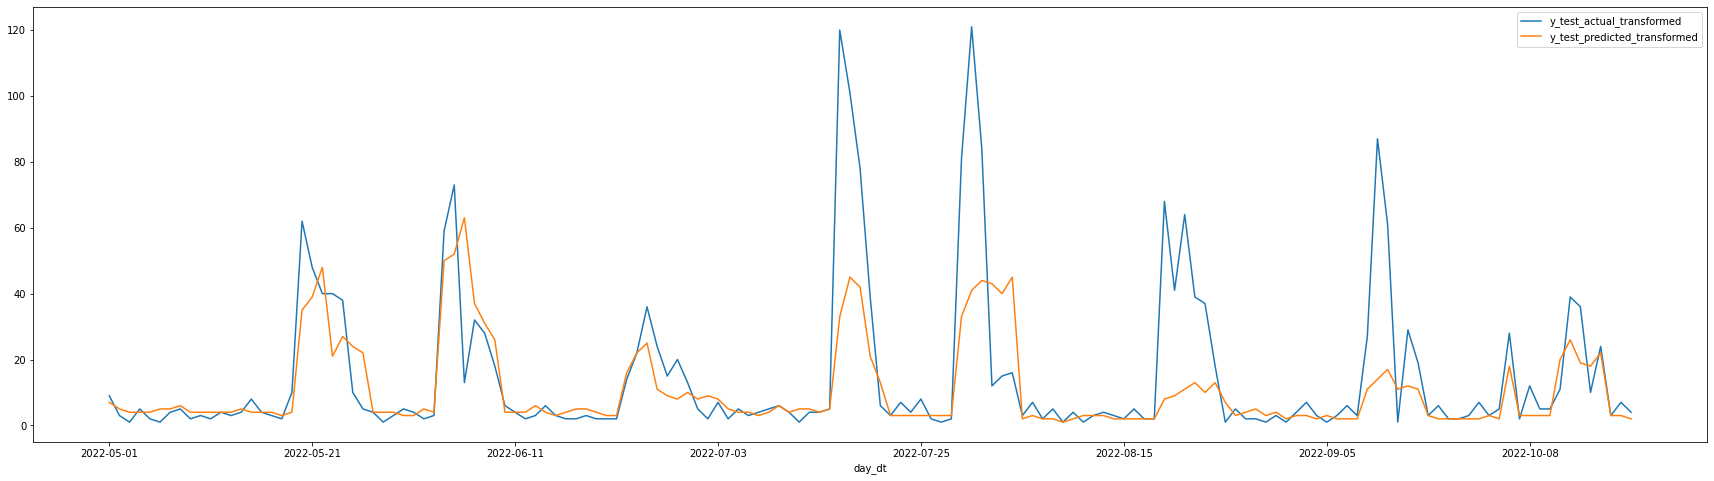

In [101]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc.isin([322045]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

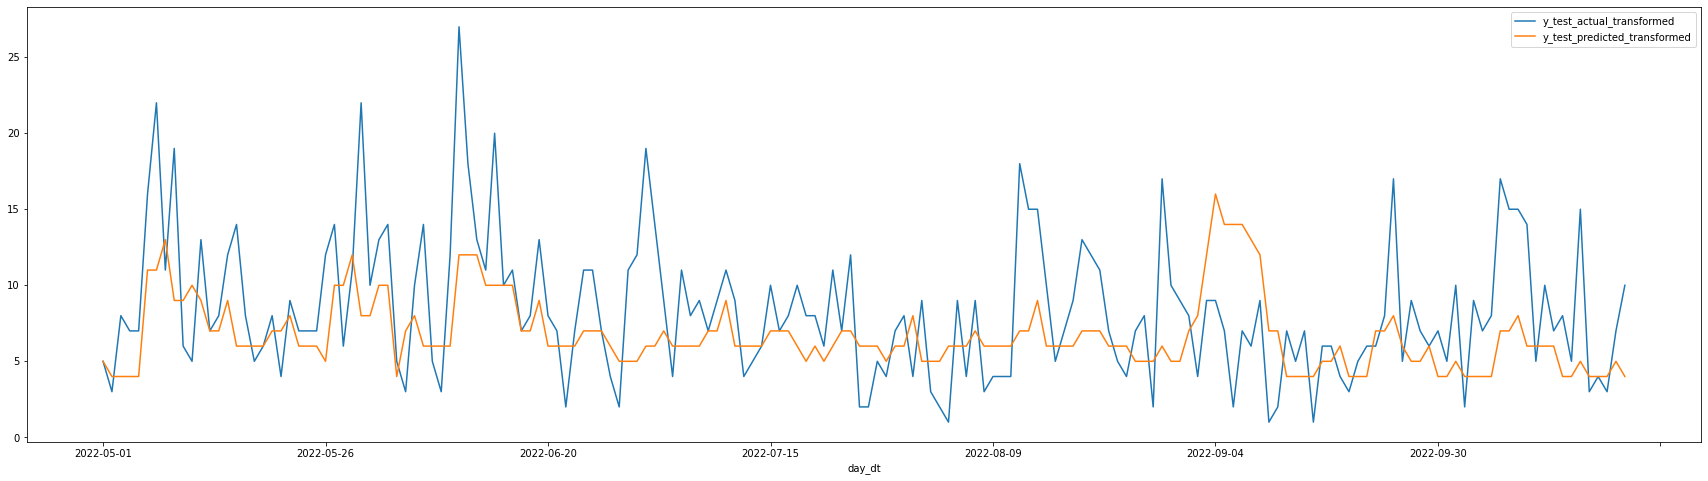

In [110]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc.isin([322087]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

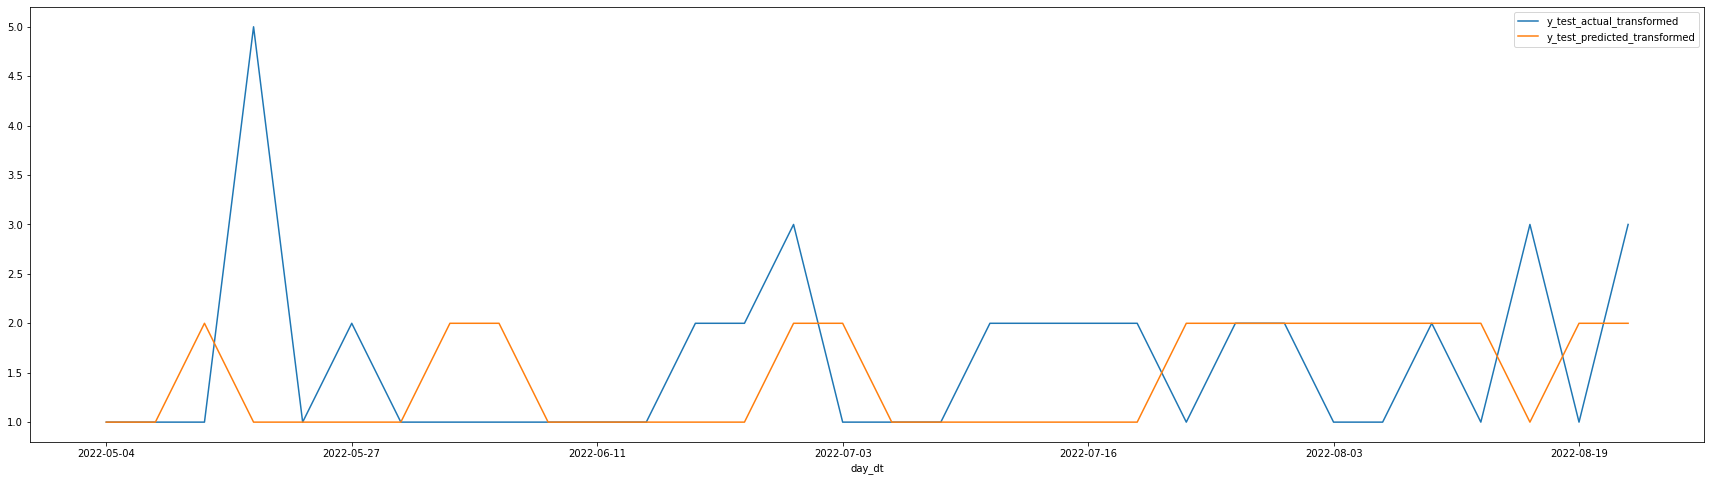

In [102]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 326) & (df_test_actual_vs_predicted.csc == 461103)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

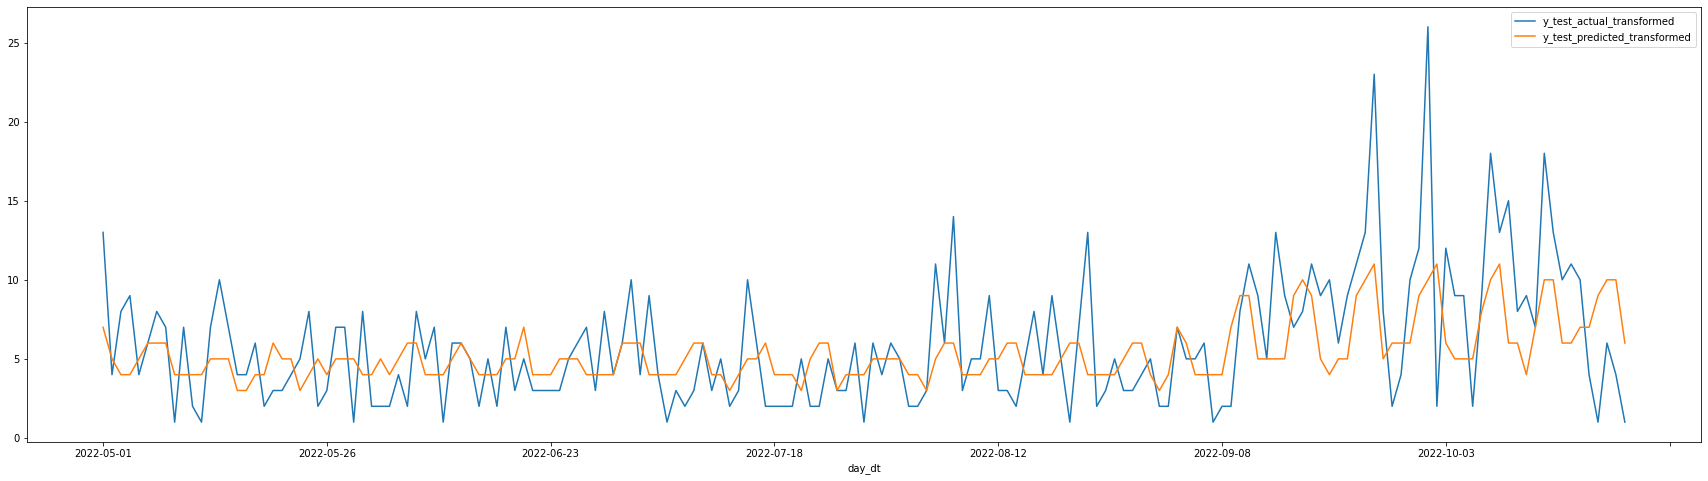

In [103]:
df_test_actual_vs_predicted[(df_test_actual_vs_predicted.store_id == 619) & (df_test_actual_vs_predicted.csc == 146385)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [104]:
df_txn[(df_txn.store_id == 619) & (df_txn.consumer_selling_cd == 146385) & (df_txn.txn_dte == '2022-05-01')].iloc[0]

txn_dte                     2022-05-01
consumer_selling_cd             146385
smic_group_cd                       25
store_id                           619
reg_unit_prc                      2.29
promo_unit_prc                     NaN
total_gross_amt                  29.77
total_item_qty                      13
total_mkdn_qty                       3
total_mkdn_amt                   -0.09
total_net_amt                    29.68
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         2.29
promo_depth                        1.0
Name: 34201, dtype: object

In [105]:
orig_df_weather_txn_combined.loc[['2022-05-01']].iloc[0]

zip5                             02747
high_temperature_amt              61.2
low_temperature_amt               34.7
avg_temperature_amt              47.95
historic_tmin                    33.98
historic_tmax                    64.04
historic_tavg                    50.36
holiday_ind                          0
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      2.29
promo_unit_prc                     NaN
total_gross_amt                  29.77
total_item_qty                      13
total_mkdn_qty                       3
total_mkdn_amt                   -0.09
total_net_amt                    29.68
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         2.29
promo_depth                        1.0
log_total_item_qty          2.63905733
log_avg_temperature_amt     3.89079937
log_historic_tavg           3.93885966
log_historic_tmin        

In [106]:
df_test[(df_test.store_id == 619) & (df_test.consumer_selling_cd == 146385)]

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2022-05-01  02747       619               146385   1.00000000   
2022-05-02  02747       619               146385   1.00000000   
2022-05-03  02747       619               146385   1.00000000   
2022-05-04  02747       619               146385   1.00000000   
2022-05-05  02747       619               146385   1.00000000   
...           ...       ...                  ...          ...   
2022-10-20  02747       619               146385   0.65502183   
2022-10-21  02747       619               146385   0.65502183   
2022-10-22  02747       619               146385   0.65502183   
2022-10-23  02747       619               146385   0.65502183   
2022-10-24  02747       619               146385   0.65502183   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2022-05-01               3.89079937         3.93885966         3.55477647   
2022-05-02               3.92986292         3.92118094         3.66202200   
2022-05-03               3.92098275         3.95966966         3.86995023   
2022-05-04               3.96745771         3.98675935         3.89222838   
2022-05-05               4.05958057         4.04515432         3.91042172   
...                             ...                ...                ...   
2022-10-20               3.90096206         3.88115134         3.44041809   
2022-10-21               4.02445843         3.93534883         3.64805746   
2022-10-22               4.01548171         3.93885966         3.60983625   
2022-10-23               3.93963817         4.01638302         3.81990772   
2022-10-24               4.10841182         4.08227198         4.00003388   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2022-05-01         4.17500247     1.19088756          2.63905733          6   
2022-05-02         4.00660565     1.19088756          1.60943791          0   
2022-05-03         4.06078778     1.19088756          2.19722458          1   
2022-05-04         4.09434456     1.19088756          2.30258509          2   
2022-05-05         4.23410650     1.19088756          1.60943791          3   
...                       ...            ...                 ...        ...   
2022-10-20         4.06388535     0.91629073          1.60943791          3   
2022-10-21         4.17500247     0.91629073          0.69314718          4   
2022-10-22         4.21833054     0.91629073          1.94591015          5   
2022-10-23         4.15261347     0.91629073          1.60943791          6   
2022-10-24         4.15261347     0.91629073          0.69314718          0   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2022-05-01        2      5  2022        121           1          17  
2022-05-02        2      5  2022        122           2          18  
2022-05-03        2      5  2022        123           3          18  
2022-05-04        2      5  2022        124           4          18  
2022-05-05        2      5  2022        125           5          18  
...             ...    ...   ...        ...         ...         ...  
2022-10-20        4     10  2022        293          20          42  
2022-10-21        4     10  2022        294          21          42  
2022-10-22        4     10  2022        295          22          42  
2022-10-23        4     10  2022        296          23          42  
2022-10-24        4     10  2022        297          24          43  

[171 rows x 17 columns]

# ***End of my experimentation***